In [92]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Upload all data being compared.

In [93]:
hpi=pd.read_csv('../data/corrected_hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [94]:
hpi_zip0=hpi[hpi['one-digit ZIP']=='new england']
hpi_zip1=hpi[hpi['one-digit ZIP']=='northeast']
hpi_zip2=hpi[hpi['one-digit ZIP']=='mid atlantic']
hpi_zip3=hpi[hpi['one-digit ZIP']=='southeast']
hpi_zip4=hpi[hpi['one-digit ZIP']=='midwest']
hpi_zip5=hpi[hpi['one-digit ZIP']=='northern plains']
hpi_zip6=hpi[hpi['one-digit ZIP']=='plains']
hpi_zip7=hpi[hpi['one-digit ZIP']=='south central']
hpi_zip8=hpi[hpi['one-digit ZIP']=='western']
hpi_zip9=hpi[hpi['one-digit ZIP']=='pacific']

3. Merge data on matching zips.

In [95]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [96]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [97]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Year by year HPI percent change','percent_change':'employment year by year percent change'}

In [98]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

In [99]:
ZIP_VS_HPI = ZIP_VS_HPI.fillna(0)

In [100]:
ZIP_VS_HPI = ZIP_VS_HPI.drop(['Year by year HPI percent change'],axis=1)

6. Create pivot tables for use in graphs.

In [101]:
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')
hpi_1975_base_pivot = pd.pivot_table(ZIP_VS_HPI, values='1975 HPI base', index='Year', columns='one-digit ZIP')

In [102]:
order = ['new england','northeast','mid atlantic','southeast','midwest','northern plains','plains','south central','western','pacific']

In [103]:
hpi_1975_base_pivot=hpi_1975_base_pivot.reindex(columns=order)

In [104]:
b=hpi_1975_base_pivot.mean().reset_index().rename(columns={'one-digit ZIP':'Region', 0:'Mean HPI of region'})

In [105]:
colors=['hotpink','lime','royalblue','orange','cyan','purple','green','deeppink','yellow','turquoise']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'new england'),
  Text(1, 0, 'northeast'),
  Text(2, 0, 'mid atlantic'),
  Text(3, 0, 'southeast'),
  Text(4, 0, 'midwest'),
  Text(5, 0, 'northern plains'),
  Text(6, 0, 'plains'),
  Text(7, 0, 'south central'),
  Text(8, 0, 'western'),
  Text(9, 0, 'pacific')])

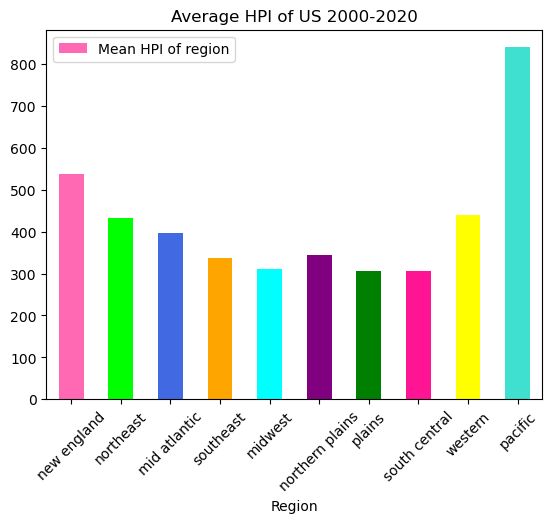

In [106]:
b.plot(kind='bar',x='Region',y='Mean HPI of region',color=colors,title='Average HPI of US 2000-2020')
plt.xticks(rotation=45)

7. Create some base visuals for possible use.

<AxesSubplot:title={'center':'HPI with 1975 base'}, xlabel='Year'>

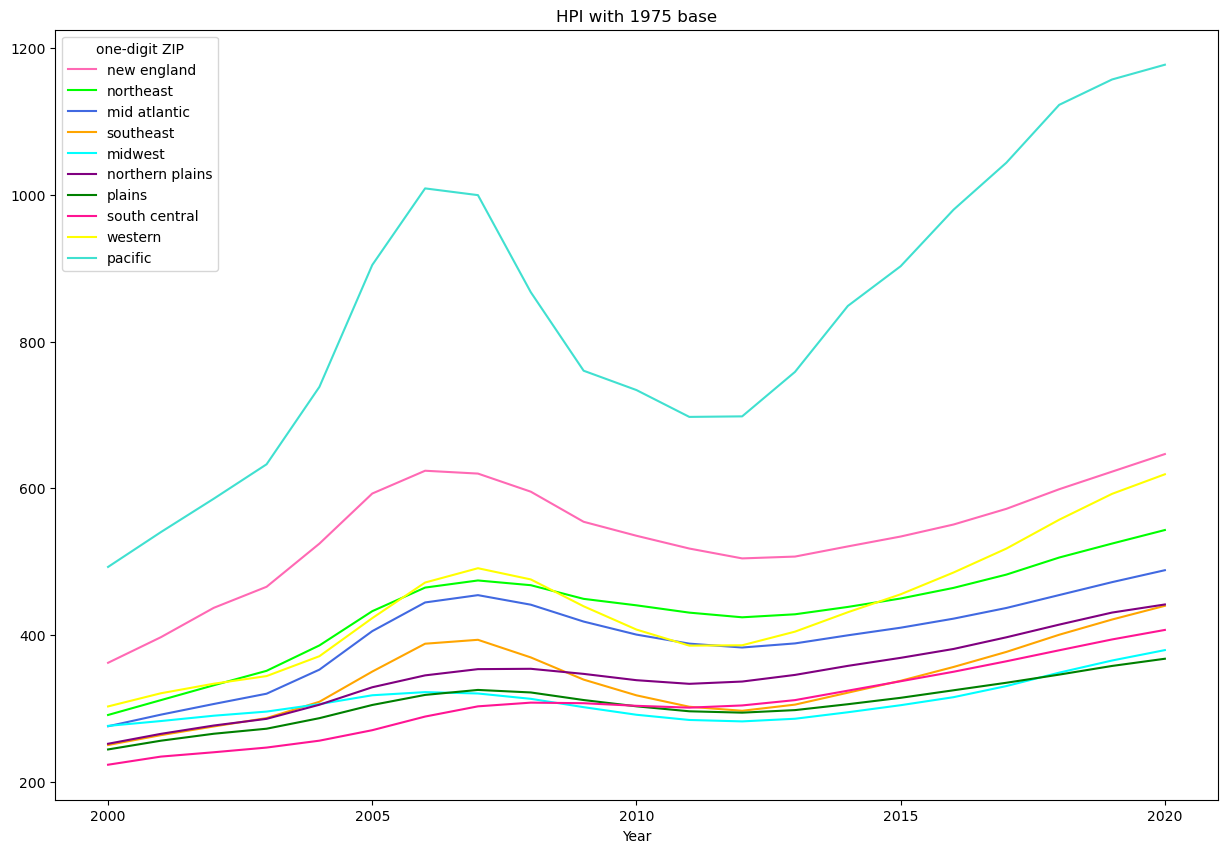

In [107]:
hpi_1975_base_pivot.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI with 1975 base',color=colors)

In [108]:
a= employment_percent_pivot_table.mean().reset_index().rename(columns={'one-digit ZIP':'Region', 0:'Mean Employment in Thousands'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'mid atlantic'),
  Text(1, 0, 'midwest'),
  Text(2, 0, 'new england'),
  Text(3, 0, 'northeast'),
  Text(4, 0, 'northern plains'),
  Text(5, 0, 'pacific'),
  Text(6, 0, 'plains'),
  Text(7, 0, 'south central'),
  Text(8, 0, 'southeast'),
  Text(9, 0, 'western')])

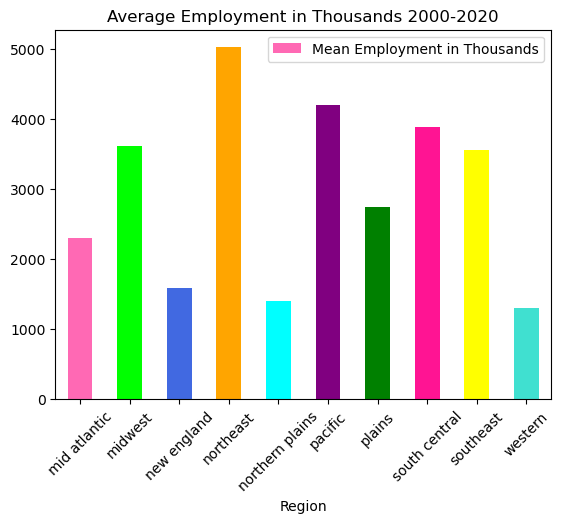

In [109]:
a.plot(kind='bar',x='Region',y='Mean Employment in Thousands',color=colors,title='Average Employment in Thousands 2000-2020')
plt.xticks(rotation=45)

<AxesSubplot:title={'center':'Employment in Thousands'}, xlabel='Year'>

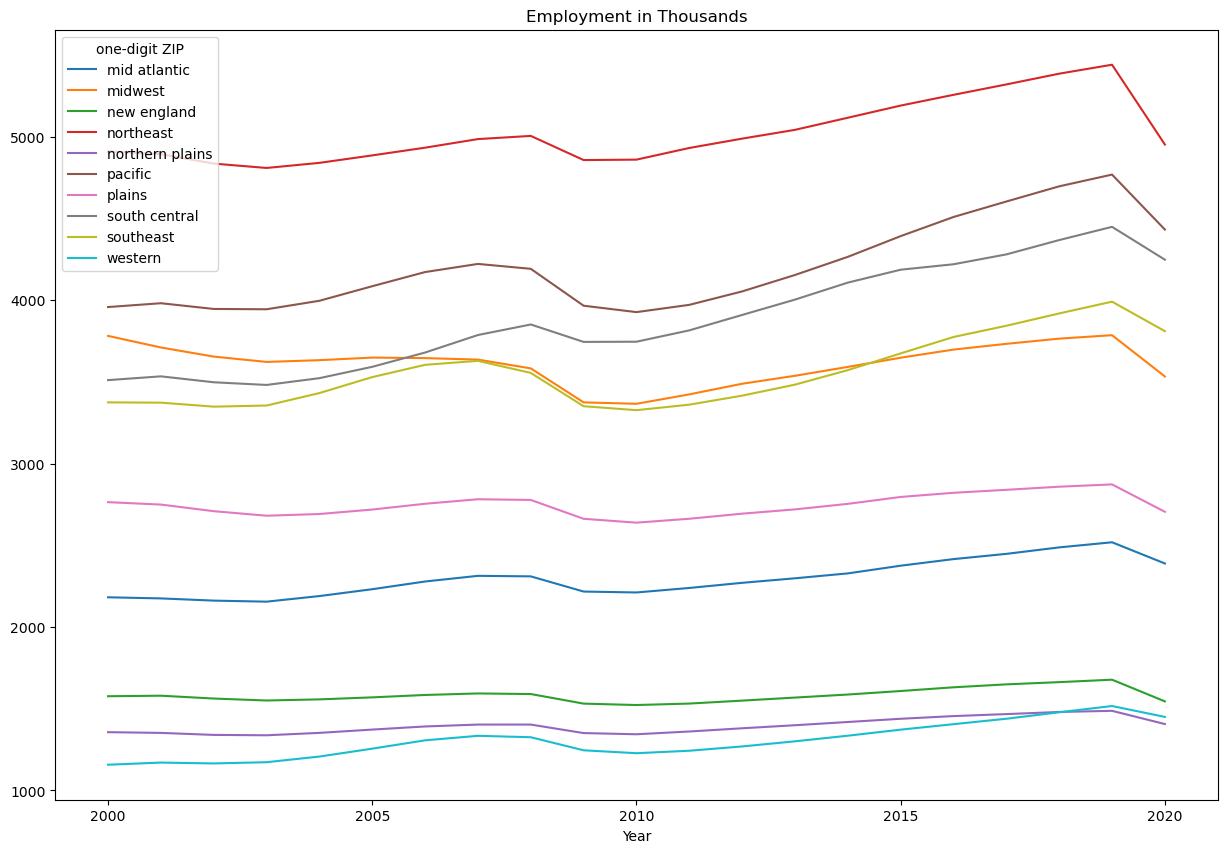

In [110]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands')

In [111]:
HPI_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='Percent change since 2000', index='Year', columns='one-digit ZIP')

<AxesSubplot:title={'center':'HPI Percentage Change Since 2000'}, xlabel='Year'>

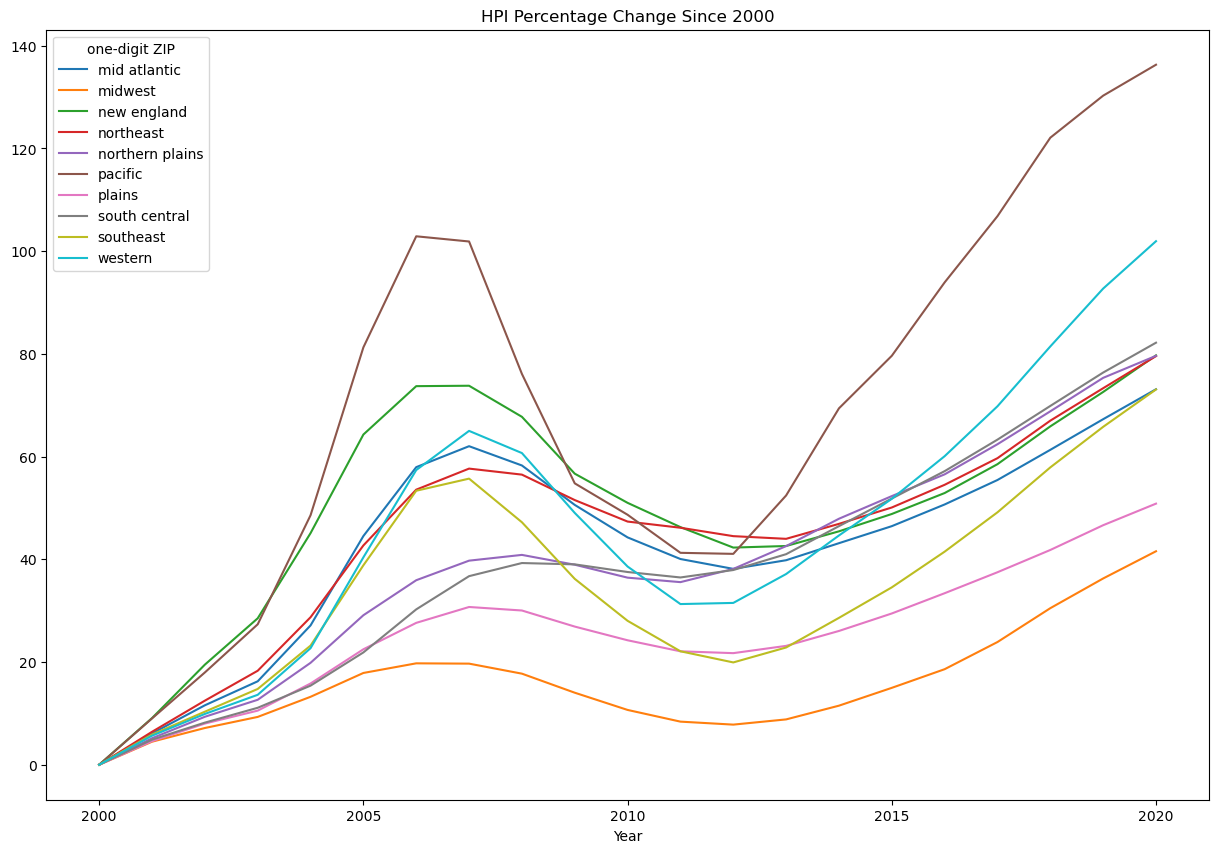

In [112]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000')

In [113]:
Employment_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment percent change since 2000', index='Year', columns='one-digit ZIP')

<AxesSubplot:title={'center':'Employment Percentage Change Since 2000'}, xlabel='Year'>

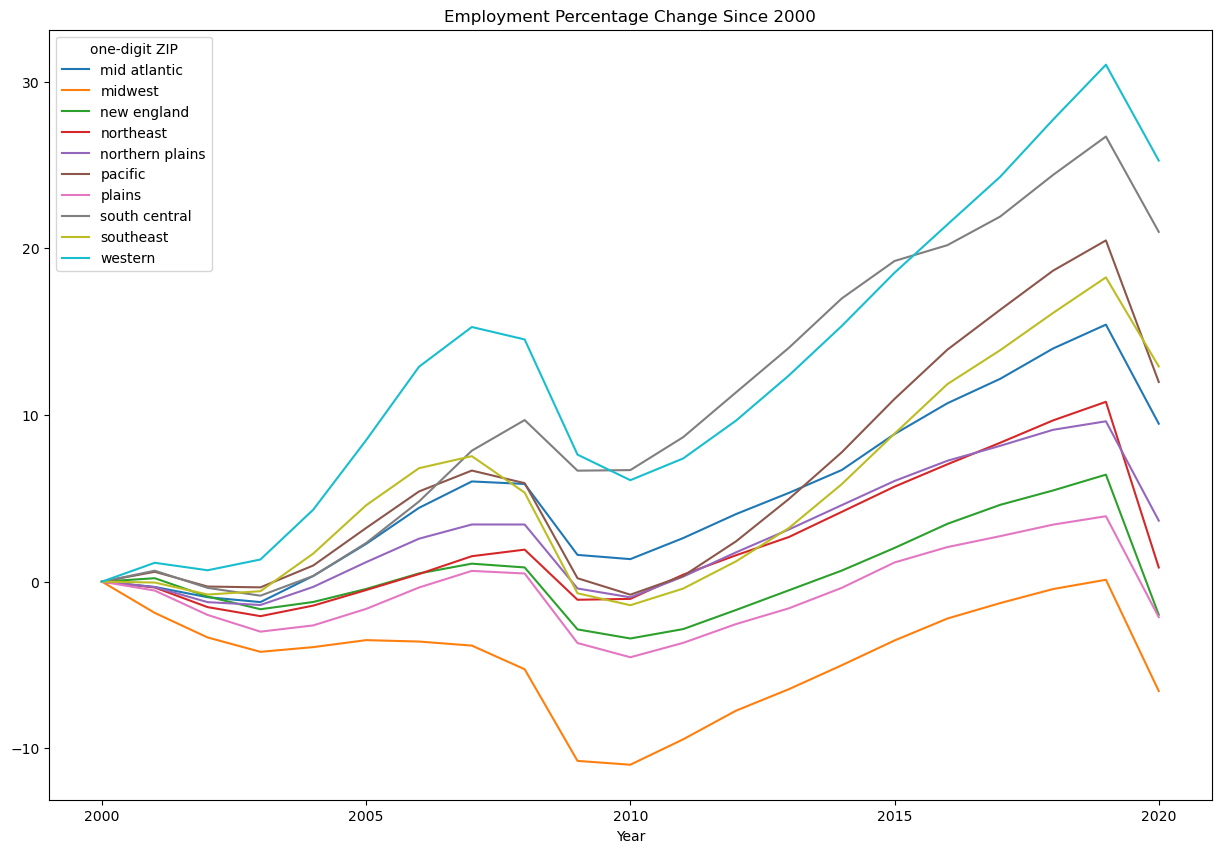

In [114]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000')

In [115]:
sum_hpi_country = ZIP_VS_HPI.groupby('Year')['1975 HPI base'].sum().reset_index()

<AxesSubplot:title={'center':'HPI of US'}, xlabel='Year'>

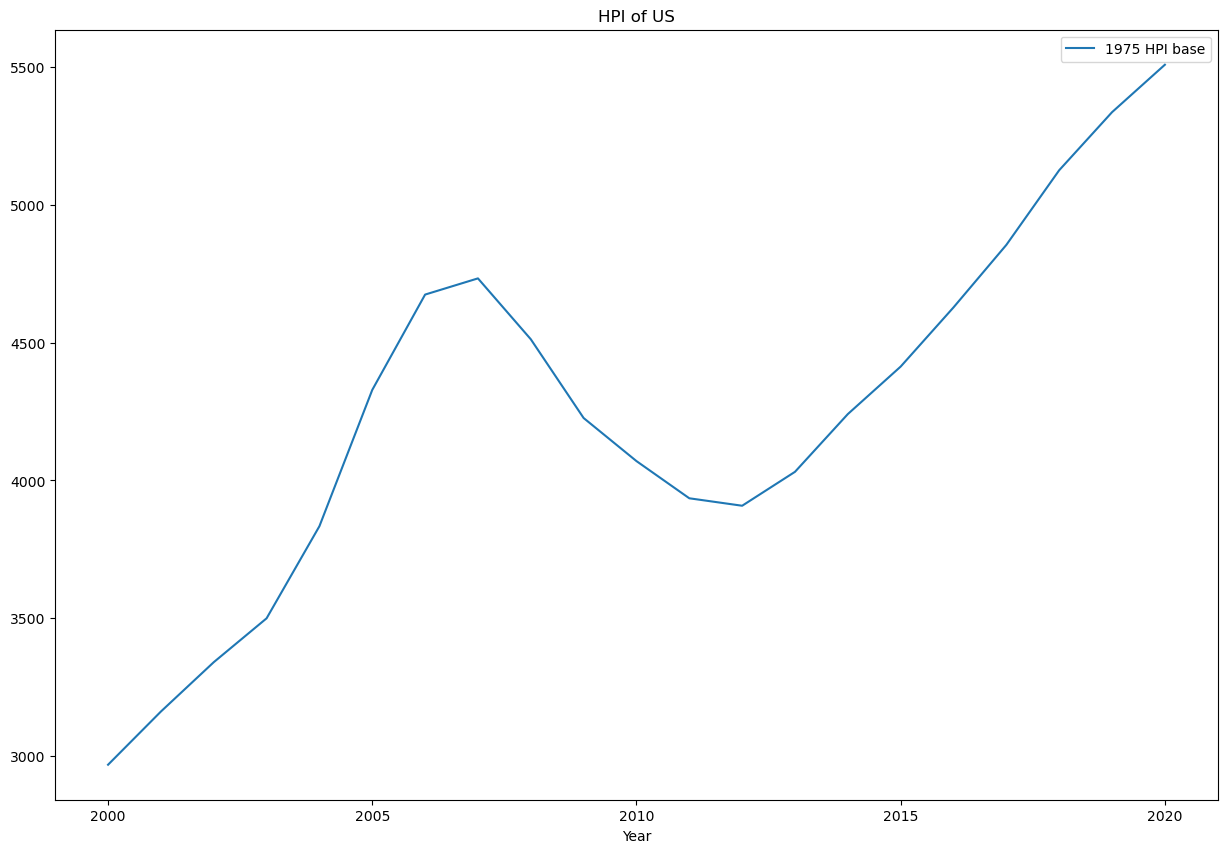

In [116]:
sum_hpi_country.plot(x='Year',y='1975 HPI base', kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI of US')

In [117]:
sum_of_employment_years_2000_2020 = ZIP_VS_HPI.groupby('Year')['employment_by_thosands'].sum().reset_index()

<AxesSubplot:title={'center':'Employment in US by Thousands'}, xlabel='Year'>

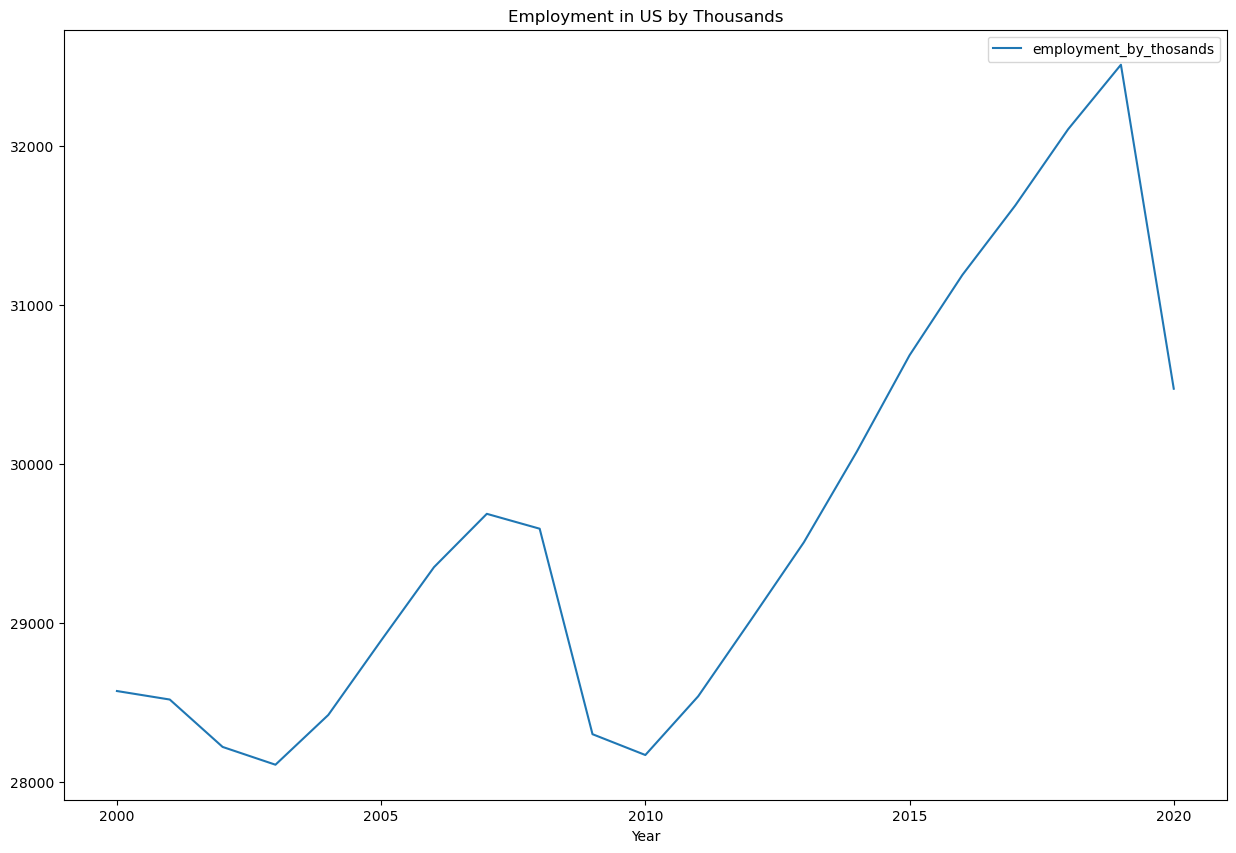

In [118]:
sum_of_employment_years_2000_2020.plot(x='Year',y='employment_by_thosands', kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in US by Thousands')

In [119]:
c=ZIP_VS_HPI[ZIP_VS_HPI['Year']==2020]

In [120]:
c

one-digit ZIP  Year  HPI with 2000 base  1975 HPI base  \
20      new england  2020          179.710390     646.576026   
20        northeast  2020          179.561979     543.007708   
20     mid atlantic  2020          173.111758     488.238387   
20        southeast  2020          173.066889     439.701429   
20          midwest  2020          141.566237     379.304271   
20  northern plains  2020          179.619419     441.517209   
20           plains  2020          150.839419     367.529302   
20    south central  2020          182.176556     406.802857   
20          western  2020          201.938904     619.007260   
20          pacific  2020          236.302386    1177.330341   

    Percent change since 2000  HPI year by year percent change since 2000  \
20                  79.710390                                    4.130624   
20                  79.561979                                    3.604906   
20                  73.111758                                    3.485342   
20                  73.066889                                    4.387542   
20                  41.566237                                    3.887969   
20                  79.619419                                    2.445600   
20                  50.839419                                    2.865718   
20                  82.176556                                    3.295707   
20                 101.938904                                    4.786107   
20                 136.302386                                    2.615245   

    Percent change since 2010  zip  employment_by_thosands  \
20                  19.021078    0             1545.302381   
20                  21.863360    1             4952.447222   
20                  19.996176    2             2388.965278   
20                  35.187149    3             3810.531667   
20                  27.920179    4             3533.283333   
20                  31.661771    5             1406.493056   
20                  21.418683    6             2705.268750   
20                  32.468597    7             4247.839583   
20                  45.709578    8             1450.178571   
20                  58.944594    9             4432.243333   

    employment year by year percent change  \
20                               -7.904031   
20                               -8.973941   
20                               -5.151070   
20                               -4.520766   
20                               -6.669998   
20                               -5.437899   
20                               -5.828153   
20                               -4.515796   
20                               -4.389759   
20                               -7.050876   

    employment percent change since 2000  employment percent change since 2010  
20                             -1.991424                              1.469924  
20                              0.848759                              1.902439  
20                              9.477592                              8.017533  
20                             12.913396                             14.534252  
20                             -6.564283                              4.968302  
20                              3.661882                              4.647294  
20                             -2.131798                              2.520924  
20                             20.990119                             13.399201  
20                             25.269559                             18.080812  
20                             11.982365                             12.865934

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'new england'),
  Text(1, 0, 'northeast'),
  Text(2, 0, 'mid atlantic'),
  Text(3, 0, 'southeast'),
  Text(4, 0, 'midwest'),
  Text(5, 0, 'northern plains'),
  Text(6, 0, 'plains'),
  Text(7, 0, 'south central'),
  Text(8, 0, 'western'),
  Text(9, 0, 'pacific')])

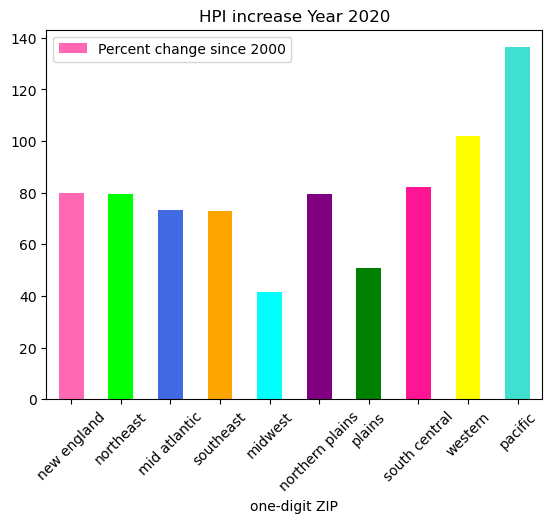

In [163]:
c.plot(kind='bar',x='one-digit ZIP',y='Percent change since 2000',color=colors,title='HPI increase Year 2020')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'new england'),
  Text(1, 0, 'northeast'),
  Text(2, 0, 'mid atlantic'),
  Text(3, 0, 'southeast'),
  Text(4, 0, 'midwest'),
  Text(5, 0, 'northern plains'),
  Text(6, 0, 'plains'),
  Text(7, 0, 'south central'),
  Text(8, 0, 'western'),
  Text(9, 0, 'pacific')])

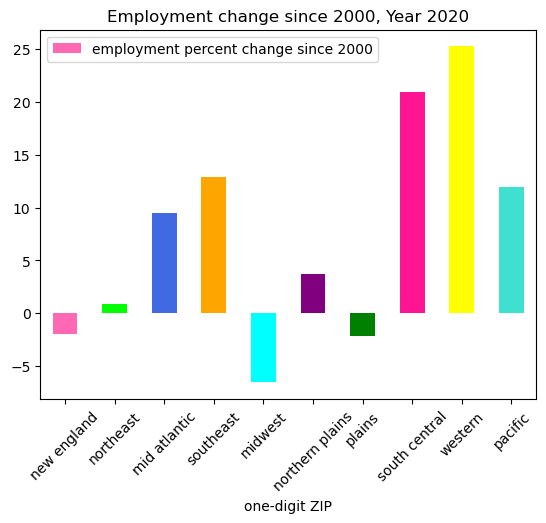

In [164]:
c.plot(kind='bar',x='one-digit ZIP',y='employment percent change since 2000',color=colors,title='Employment change since 2000, Year 2020')
plt.xticks(rotation=45)

In [123]:
c

one-digit ZIP  Year  HPI with 2000 base  1975 HPI base  \
20      new england  2020          179.710390     646.576026   
20        northeast  2020          179.561979     543.007708   
20     mid atlantic  2020          173.111758     488.238387   
20        southeast  2020          173.066889     439.701429   
20          midwest  2020          141.566237     379.304271   
20  northern plains  2020          179.619419     441.517209   
20           plains  2020          150.839419     367.529302   
20    south central  2020          182.176556     406.802857   
20          western  2020          201.938904     619.007260   
20          pacific  2020          236.302386    1177.330341   

    Percent change since 2000  HPI year by year percent change since 2000  \
20                  79.710390                                    4.130624   
20                  79.561979                                    3.604906   
20                  73.111758                                    3.485342   
20                  73.066889                                    4.387542   
20                  41.566237                                    3.887969   
20                  79.619419                                    2.445600   
20                  50.839419                                    2.865718   
20                  82.176556                                    3.295707   
20                 101.938904                                    4.786107   
20                 136.302386                                    2.615245   

    Percent change since 2010  zip  employment_by_thosands  \
20                  19.021078    0             1545.302381   
20                  21.863360    1             4952.447222   
20                  19.996176    2             2388.965278   
20                  35.187149    3             3810.531667   
20                  27.920179    4             3533.283333   
20                  31.661771    5             1406.493056   
20                  21.418683    6             2705.268750   
20                  32.468597    7             4247.839583   
20                  45.709578    8             1450.178571   
20                  58.944594    9             4432.243333   

    employment year by year percent change  \
20                               -7.904031   
20                               -8.973941   
20                               -5.151070   
20                               -4.520766   
20                               -6.669998   
20                               -5.437899   
20                               -5.828153   
20                               -4.515796   
20                               -4.389759   
20                               -7.050876   

    employment percent change since 2000  employment percent change since 2010  
20                             -1.991424                              1.469924  
20                              0.848759                              1.902439  
20                              9.477592                              8.017533  
20                             12.913396                             14.534252  
20                             -6.564283                              4.968302  
20                              3.661882                              4.647294  
20                             -2.131798                              2.520924  
20                             20.990119                             13.399201  
20                             25.269559                             18.080812  
20                             11.982365                             12.865934

8. Explore averages over the years being examined.

In [124]:
year2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']==2020]
years2010_2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']>=2010]
years2000_2010 = ZIP_VS_HPI[ZIP_VS_HPI['Year']<=2010]

In [125]:
years2000_2010['employment year by year percent change'].mean()

-0.07583171238471612

In [126]:
years2010_2020['employment year by year percent change'].mean()

0.6870299144842564

In [127]:
year2020['employment percent change since 2000'].mean()

7.445616678972295

In [128]:
ZIP_VS_HPI['employment year by year percent change'].mean()

0.3465122619820257

In [129]:
year2020['Percent change since 2000'].mean()

79.78939357049266

In [130]:
ZIP_VS_HPI

one-digit ZIP  Year  HPI with 2000 base  1975 HPI base  \
0    new england  2000          100.000000     362.011688   
1    new england  2001          109.081169     396.925455   
2    new england  2002          119.488961     436.928961   
3    new england  2003          128.511558     465.643462   
4    new england  2004          145.091299     524.491154   
..           ...   ...                 ...            ...   
16       pacific  2016          193.916591     979.643977   
17       pacific  2017          206.816705    1043.760909   
18       pacific  2018          222.095568    1122.624886   
19       pacific  2019          230.280000    1157.207045   
20       pacific  2020          236.302386    1177.330341   

    Percent change since 2000  HPI year by year percent change since 2000  \
0                    0.000000                                    0.000000   
1                    9.081169                                    9.081169   
2                   19.488961                                    9.541328   
3                   28.511558                                    7.550988   
4                   45.091299                                   12.901361   
..                        ...                                         ...   
16                  93.916591                                    7.955119   
17                 106.816705                                    6.652403   
18                 122.095568                                    7.387635   
19                 130.280000                                    3.685095   
20                 136.302386                                    2.615245   

    Percent change since 2010  zip  employment_by_thosands  \
0                  -33.770619    0             1576.701190   
1                  -27.756217    0             1579.947619   
2                  -20.863201    0             1562.577381   
3                  -14.887591    0             1550.591667   
4                   -3.906931    0             1557.476190   
..                        ...  ...                     ...   
16                  30.434543    9             4509.011667   
17                  39.111575    9             4603.766667   
18                  49.388631    9             4696.645000   
19                  54.893743    9             4768.461667   
20                  58.944594    9             4432.243333   

    employment year by year percent change  \
0                                 0.000000   
1                                 0.205900   
2                                -1.099419   
3                                -0.767048   
4                                 0.443993   
..                                     ...   
16                                2.664083   
17                                2.101458   
18                                2.017442   
19                                1.529106   
20                               -7.050876   

    employment percent change since 2000  employment percent change since 2010  
0                               0.000000                              3.531679  
1                               0.205900                              3.744850  
2                              -0.895782                              2.604260  
3                              -1.655959                              1.817237  
4                              -1.219318                              2.269298  
..                                   ...                                   ...  
16                             13.921947                             14.820819  
17                             16.315969                             17.233731  
18                             18.662576                             19.598854  
19                             20.477053                             21.427647  
20                             11.982365                             12.865934  

[210 rows x 12 columns]

9. Explore key differences between 2000-2010 and 2010-2020

In [131]:
years_comparison = ZIP_VS_HPI[(ZIP_VS_HPI['Year']==2010) | (ZIP_VS_HPI['Year']==2020)]

In [132]:
years_comparison = years_comparison[['one-digit ZIP','Year','Percent change since 2000','Percent change since 2010','employment percent change since 2000','employment percent change since 2010']]

In [133]:
years_comparison

one-digit ZIP  Year  Percent change since 2000  \
10      new england  2010                  50.990390   
20      new england  2020                  79.710390   
10        northeast  2010                  47.346979   
20        northeast  2020                  79.561979   
10     mid atlantic  2010                  44.264396   
20     mid atlantic  2020                  73.111758   
10        southeast  2010                  28.020222   
20        southeast  2020                  73.066889   
10          midwest  2010                  10.667634   
20          midwest  2020                  41.566237   
10  northern plains  2010                  36.424884   
20  northern plains  2020                  79.619419   
10           plains  2010                  24.230814   
20           plains  2020                  50.839419   
10    south central  2010                  37.524333   
20    south central  2020                  82.176556   
10          western  2010                  38.590000   
20          western  2020                 101.938904   
10          pacific  2010                  48.669659   
20          pacific  2020                 136.302386   

    Percent change since 2010  employment percent change since 2000  \
10                   0.000000                             -3.411206   
20                  19.021078                             -1.991424   
10                   0.000000                             -1.034009   
20                  21.863360                              0.848759   
10                   0.000000                              1.351687   
20                  19.996176                              9.477592   
10                   0.000000                             -1.415171   
20                  35.187149                             12.913396   
10                   0.000000                            -10.986730   
20                  27.920179                             -6.564283   
10                   0.000000                             -0.941650   
20                  31.661771                              3.661882   
10                   0.000000                             -4.538315   
20                  21.418683                             -2.131798   
10                   0.000000                              6.693978   
20                  32.468597                             20.990119   
10                   0.000000                              6.087988   
20                  45.709578                             25.269559   
10                   0.000000                             -0.782848   
20                  58.944594                             11.982365   

    employment percent change since 2010  
10                              0.000000  
20                              1.469924  
10                              0.000000  
20                              1.902439  
10                              0.000000  
20                              8.017533  
10                              0.000000  
20                             14.534252  
10                              0.000000  
20                              4.968302  
10                              0.000000  
20                              4.647294  
10                              0.000000  
20                              2.520924  
10                              0.000000  
20                             13.399201  
10                              0.000000  
20                             18.080812  
10                              0.000000  
20                             12.865934

In [134]:
ZIP_VS_HPI.corr()

Year  HPI with 2000 base  \
Year                                        1.000000e+00            0.656353   
HPI with 2000 base                          6.563535e-01            1.000000   
1975 HPI base                               3.068484e-01            0.779561   
Percent change since 2000                   6.563535e-01            1.000000   
HPI year by year percent change since 2000  2.496905e-01            0.325728   
Percent change since 2010                   7.491529e-01            0.878657   
zip                                         9.987668e-15            0.101658   
employment_by_thosands                      8.747699e-02            0.095176   
employment year by year percent change     -4.967217e-03           -0.023697   
employment percent change since 2000        5.246217e-01            0.654442   
employment percent change since 2010        6.701195e-01            0.616605   

                                            1975 HPI base  \
Year                                             0.306848   
HPI with 2000 base                               0.779561   
1975 HPI base                                    1.000000   
Percent change since 2000                        0.779561   
HPI year by year percent change since 2000       0.197273   
Percent change since 2010                        0.568979   
zip                                              0.223701   
employment_by_thosands                           0.174366   
employment year by year percent change          -0.001347   
employment percent change since 2000             0.338856   
employment percent change since 2010             0.376317   

                                            Percent change since 2000  \
Year                                                         0.656353   
HPI with 2000 base                                           1.000000   
1975 HPI base                                                0.779561   
Percent change since 2000                                    1.000000   
HPI year by year percent change since 2000                   0.325728   
Percent change since 2010                                    0.878657   
zip                                                          0.101658   
employment_by_thosands                                       0.095176   
employment year by year percent change                      -0.023697   
employment percent change since 2000                         0.654442   
employment percent change since 2010                         0.616605   

                                            HPI year by year percent change since 2000  \
Year                                                                          0.249691   
HPI with 2000 base                                                            0.325728   
1975 HPI base                                                                 0.197273   
Percent change since 2000                                                     0.325728   
HPI year by year percent change since 2000                                    1.000000   
Percent change since 2010                                                     0.335834   
zip                                                                          -0.001357   
employment_by_thosands                                                       -0.000763   
employment year by year percent change                                        0.193940   
employment percent change since 2000                                          0.188081   
employment percent change since 2010                                          0.208569   

                                            Percent change since 2010  \
Year                                                         0.749153   
HPI with 2000 base                                           0.878657   
1975 HPI base                                                0.568979   
Percent change since 2000                                    0.878657   
HPI year by year percent change sin

In [135]:
national_corr = ZIP_VS_HPI.corr().iloc[3,8:].reset_index()

In [136]:
national_corr

index  Percent change since 2000
0  employment year by year percent change                  -0.023697
1    employment percent change since 2000                   0.654442
2    employment percent change since 2010                   0.616605

In [137]:
zip0_hpi_merge.corr()

Year  HPI with 2000 base  \
Year                                        1.000000            0.621805   
HPI with 2000 base                          0.621805            1.000000   
HPI                                         0.620068            0.998128   
Annual Change (%)                          -0.438334           -0.350090   
Percent change since 2000                   0.621805            1.000000   
HPI year by year percent change since 2000 -0.363938           -0.237090   
Percent change since 2010                   0.621805            1.000000   
zip                                              NaN                 NaN   
employment_by_thosands                      0.479081            0.283330   
percent_change                             -0.101333           -0.199024   
employment percent change since 2000        0.479081            0.283330   
employment percent change since 2010        0.479081            0.283330   

                                                 HPI  Annual Change (%)  \
Year                                        0.620068          -0.438334   
HPI with 2000 base                          0.998128          -0.350090   
HPI                                         1.000000          -0.299392   
Annual Change (%)                          -0.299392           1.000000   
Percent change since 2000                   0.998128          -0.350090   
HPI year by year percent change since 2000 -0.174374           0.999893   
Percent change since 2010                   0.998128          -0.350090   
zip                                              NaN                NaN   
employment_by_thosands                      0.314211           0.167373   
percent_change                             -0.200633           0.096122   
employment percent change since 2000        0.314211           0.167373   
employment percent change since 2010        0.314211           0.167373   

                                            Percent change since 2000  \
Year                                                         0.621805   
HPI with 2000 base                                           1.000000   
HPI                                                          0.998128   
Annual Change (%)                                           -0.350090   
Percent change since 2000                                    1.000000   
HPI year by year percent change since 2000                  -0.237090   
Percent change since 2010                                    1.000000   
zip                                                               NaN   
employment_by_thosands                                       0.283330   
percent_change                                              -0.199024   
employment percent change since 2000                         0.283330   
employment percent change since 2010                         0.283330   

                                            HPI year by year percent change since 2000  \
Year                                                                         -0.363938   
HPI with 2000 base                                                           -0.237090   
HPI                                                                          -0.174374   
Annual Change (%)                                                             0.999893   
Percent change since 2000                                                    -0.237090   
HPI year by year percent change since 2000                                    1.000000   
Percent change since 2010                                                    -0.237090   
zip                                                                                NaN   
employment_by_thosands                                                        0.188288   
percent_change                                                                0.097899   
employment percent change since 2000                                          0.188288   
employment percent change since 2010                 

In [138]:
ZIP_VS_HPI.to_csv('../data/ZIP_VS_HPI.csv',index=False)

In [139]:
years_comparison.to_csv('../data/corrected_ten_years_comparison.csv',index=False)

In [140]:
zip8_hpi_merge.to_csv('../data/region8_table')
zip3_hpi_merge.to_csv('../data/region3_table')
zip7_hpi_merge.to_csv('../data/region7_table')
zip2_hpi_merge.to_csv('../data/region2_table')
zip4_hpi_merge.to_csv('../data/region4_table')

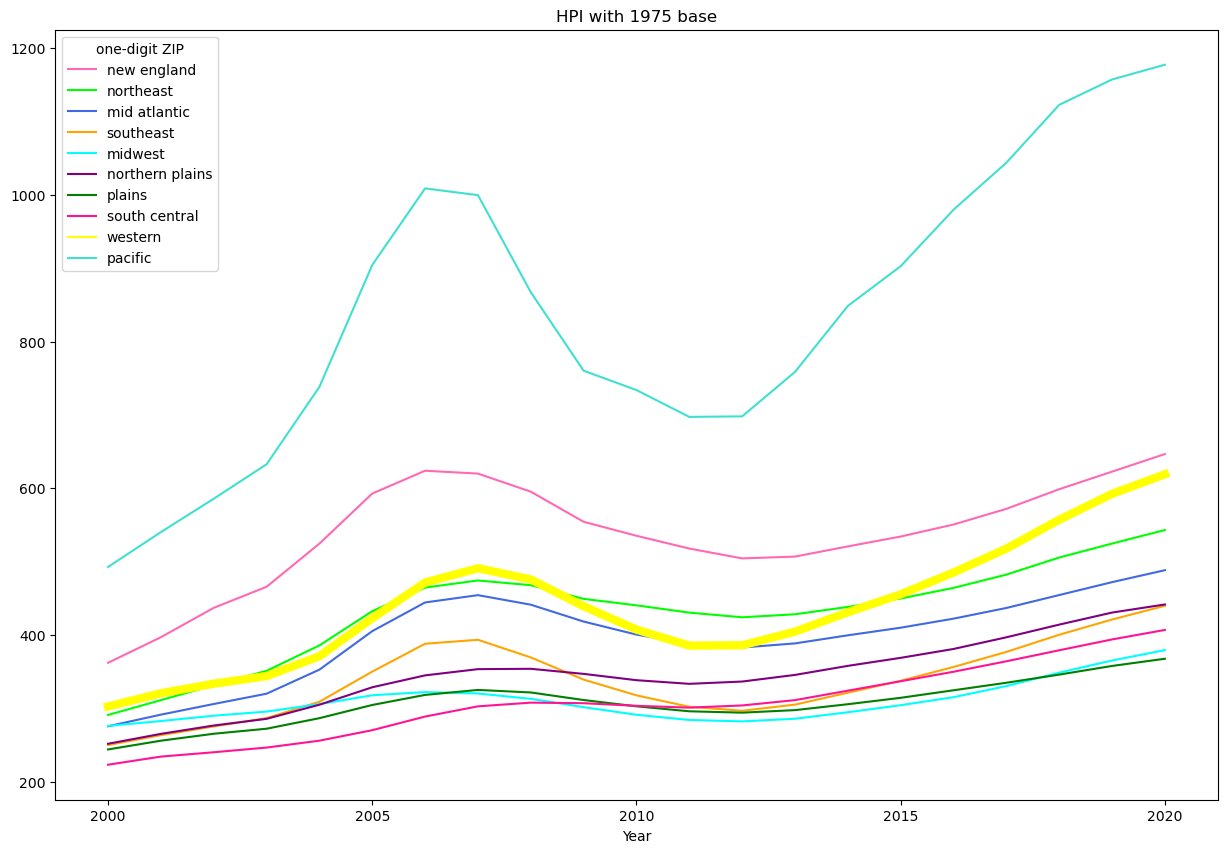

In [141]:
hpi_1975_base_pivot.plot(kind='line', figsize=(15, 10), xticks=[2000, 2005, 2010, 2015, 2020], title='HPI with 1975 base',color=colors).lines[hpi_1975_base_pivot.columns.get_loc('western')].set_linewidth(6)

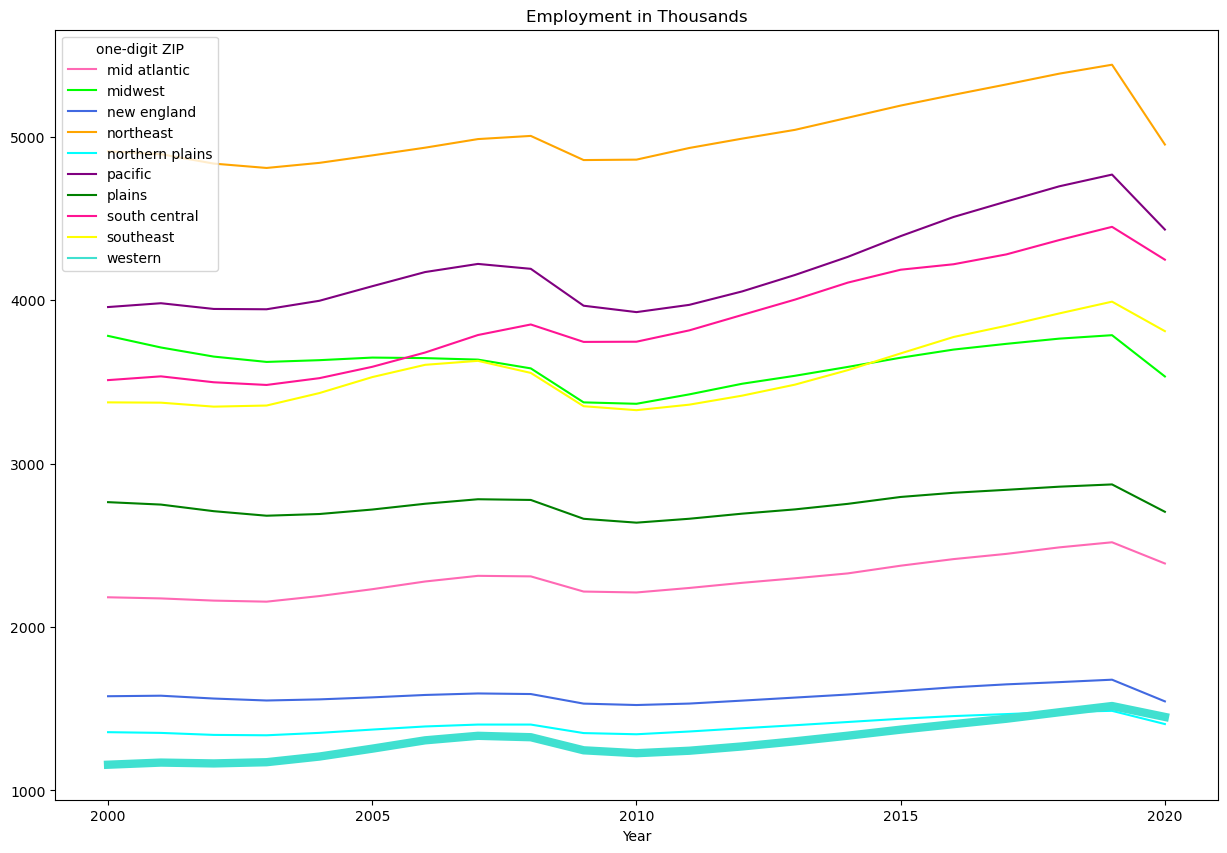

In [142]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands',color=colors).lines[employment_percent_pivot_table.columns.get_loc('western')].set_linewidth(6)

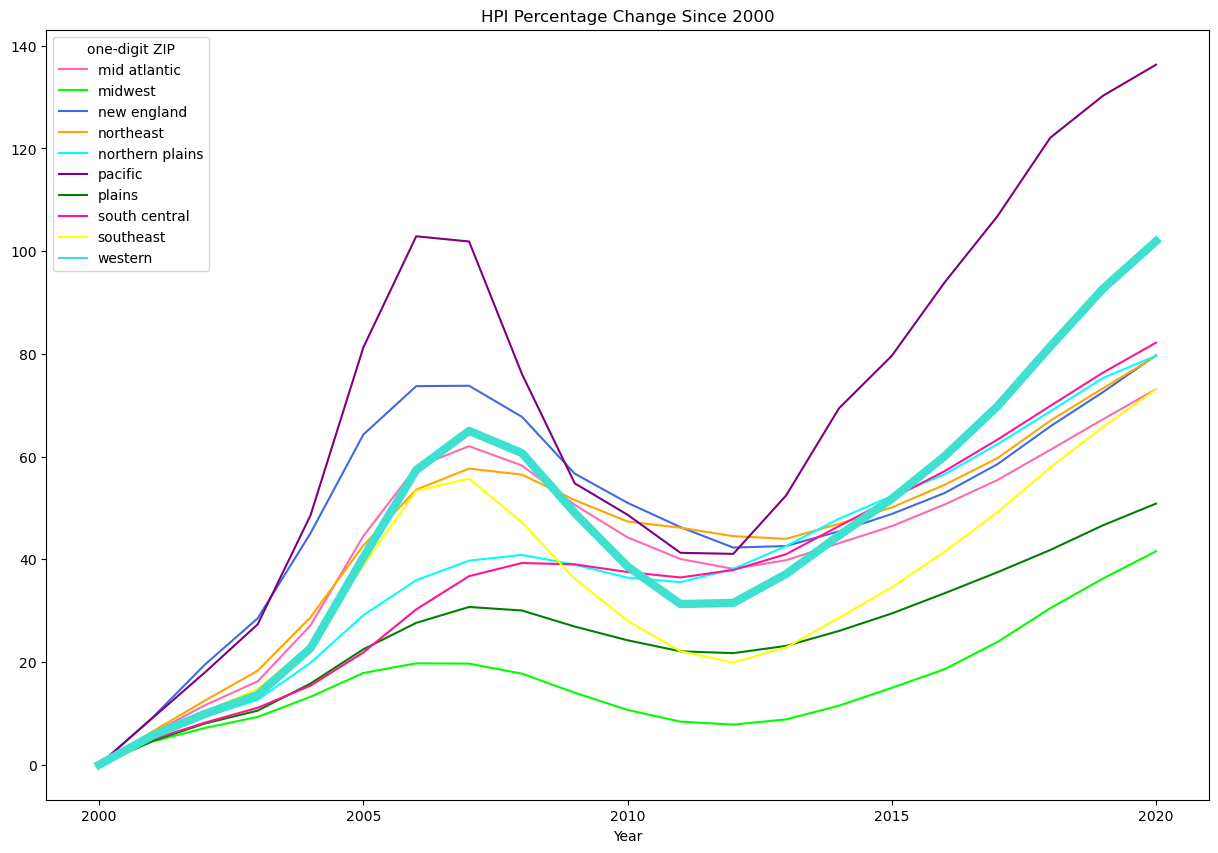

In [143]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000',color=colors).lines[HPI_Percent_change_since_2000_pivot_table.columns.get_loc('western')].set_linewidth(6)

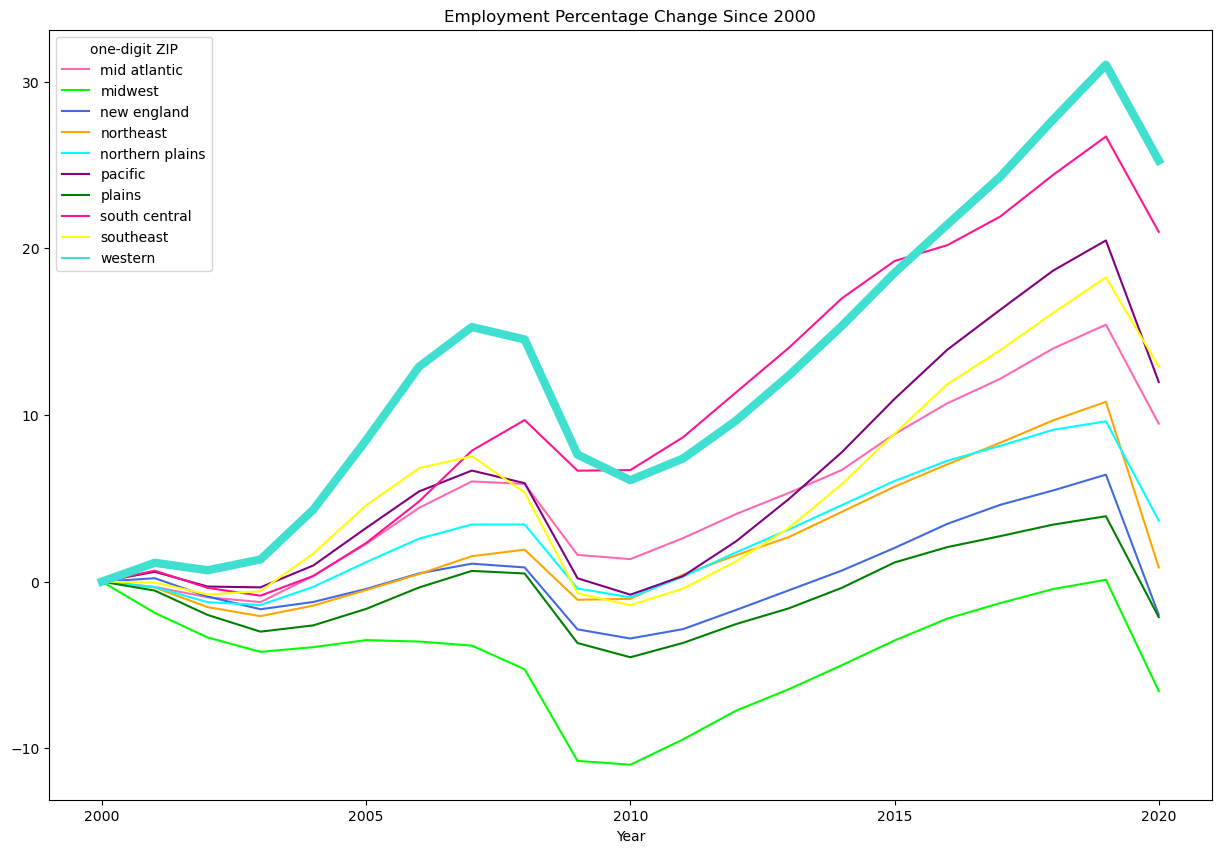

In [144]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000',color=colors).lines[Employment_Percent_change_since_2000_pivot_table.columns.get_loc('western')].set_linewidth(6)

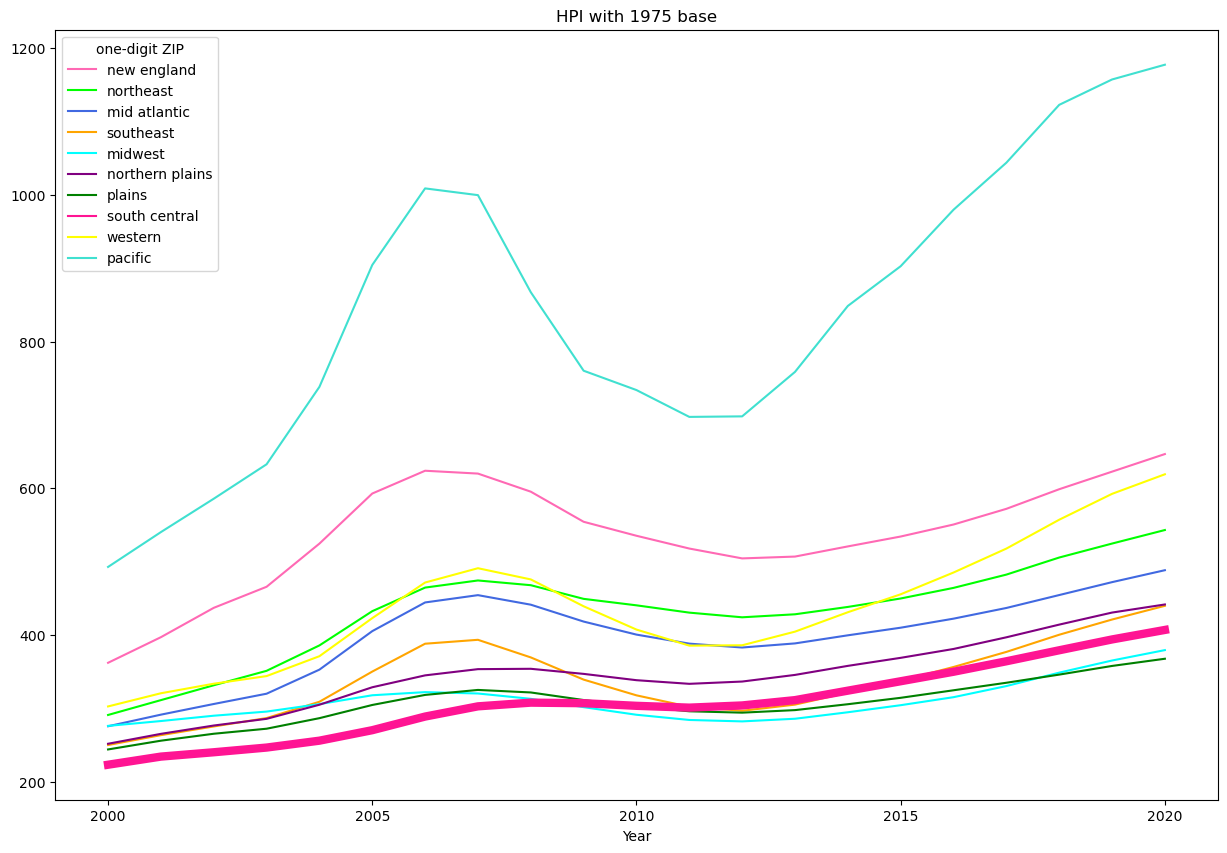

In [145]:
hpi_1975_base_pivot.plot(kind='line', figsize=(15, 10), xticks=[2000, 2005, 2010, 2015, 2020], title='HPI with 1975 base',color=colors).lines[hpi_1975_base_pivot.columns.get_loc('south central')].set_linewidth(6)

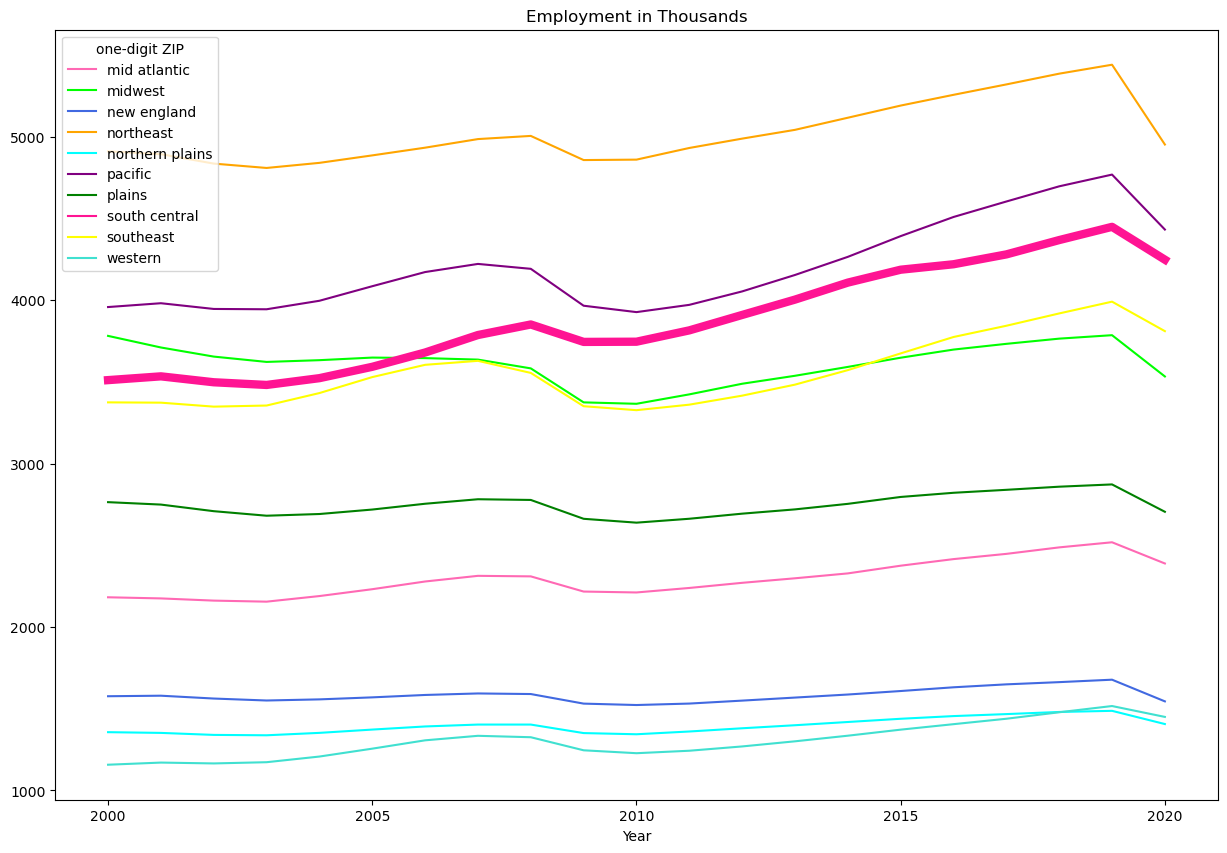

In [146]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands',color=colors).lines[employment_percent_pivot_table.columns.get_loc('south central')].set_linewidth(6)

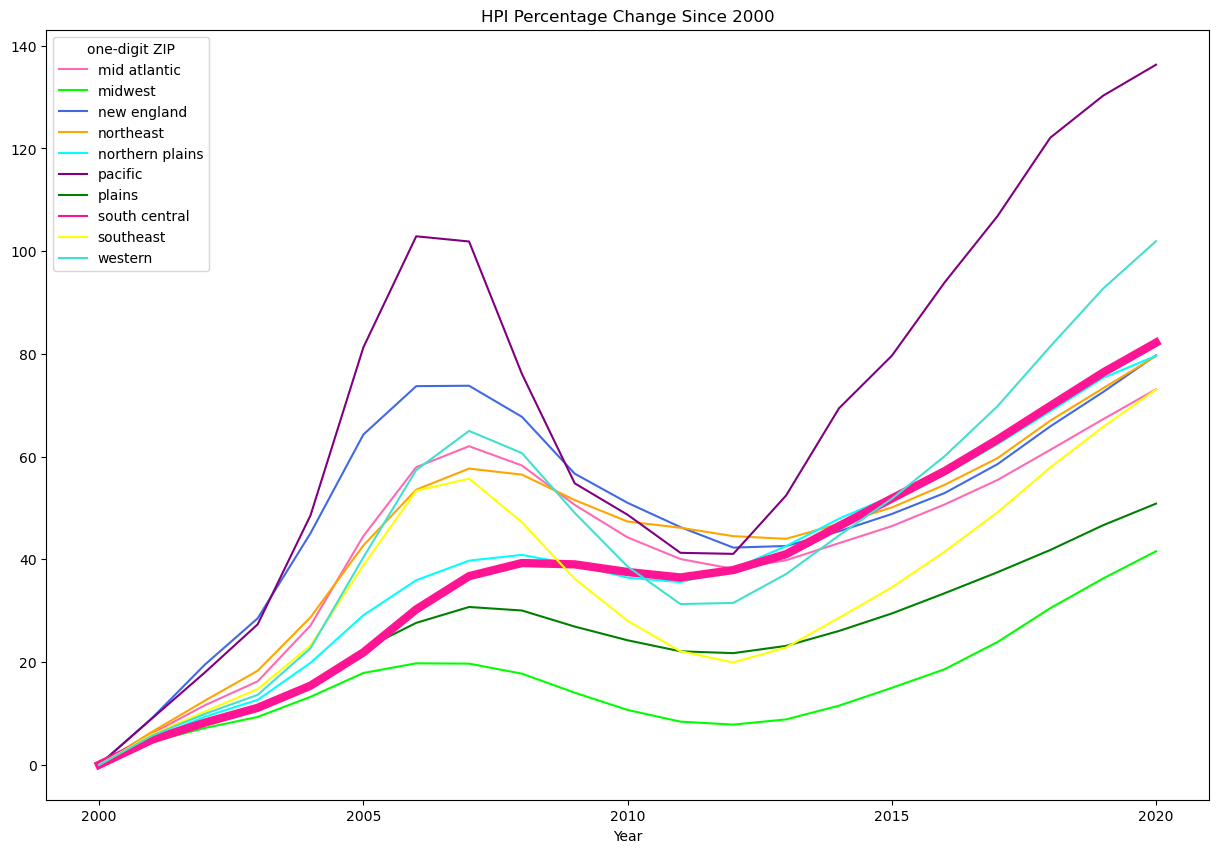

In [147]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000',color=colors).lines[HPI_Percent_change_since_2000_pivot_table.columns.get_loc('south central')].set_linewidth(6)

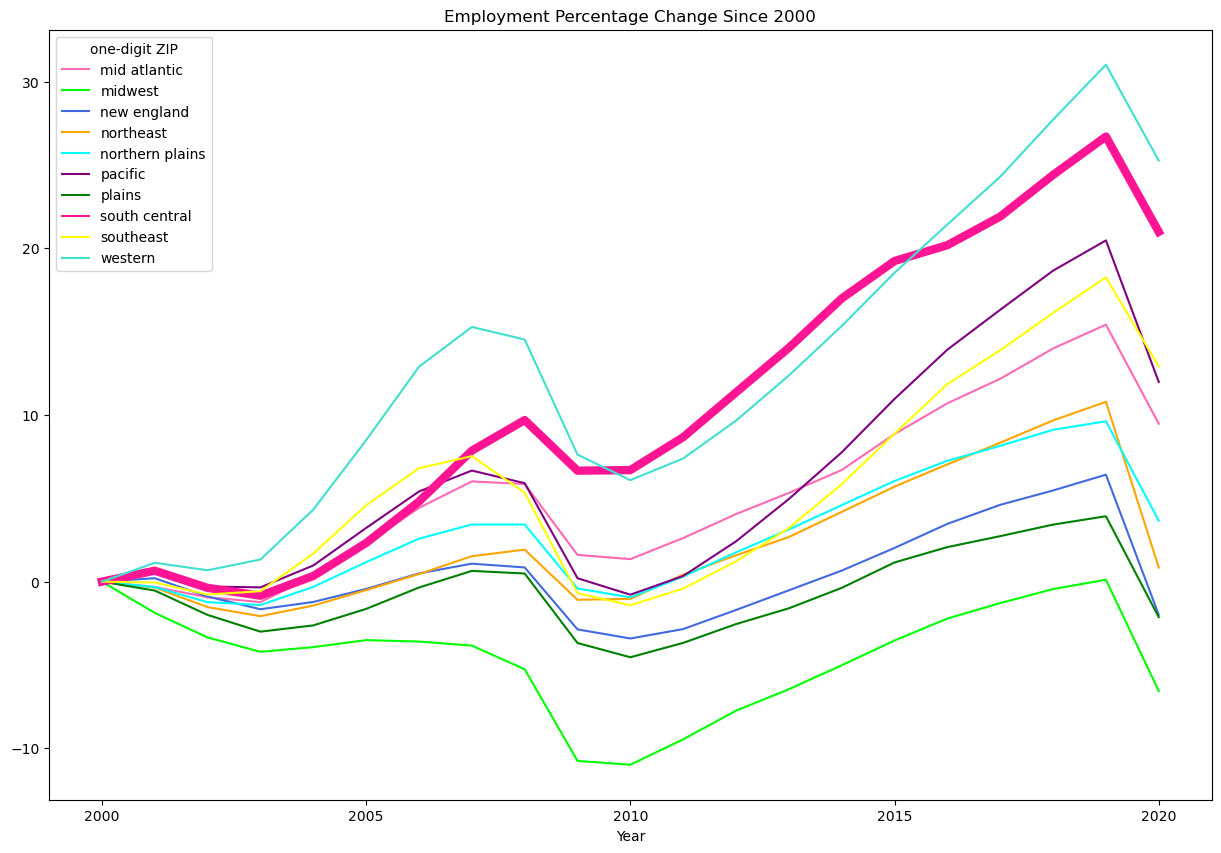

In [148]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000',color=colors).lines[Employment_Percent_change_since_2000_pivot_table.columns.get_loc('south central')].set_linewidth(6)

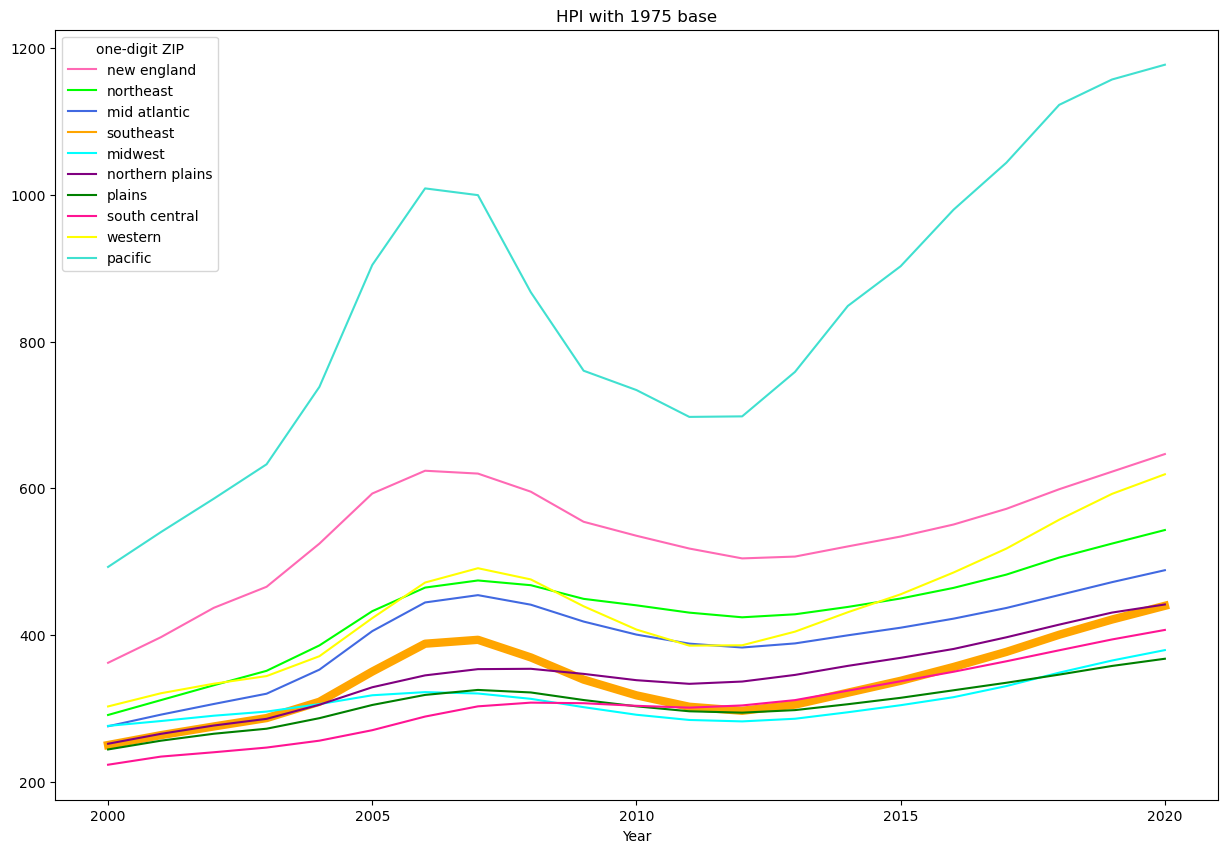

In [149]:
hpi_1975_base_pivot.plot(kind='line', figsize=(15, 10), xticks=[2000, 2005, 2010, 2015, 2020], title='HPI with 1975 base',color=colors).lines[hpi_1975_base_pivot.columns.get_loc('southeast')].set_linewidth(6)

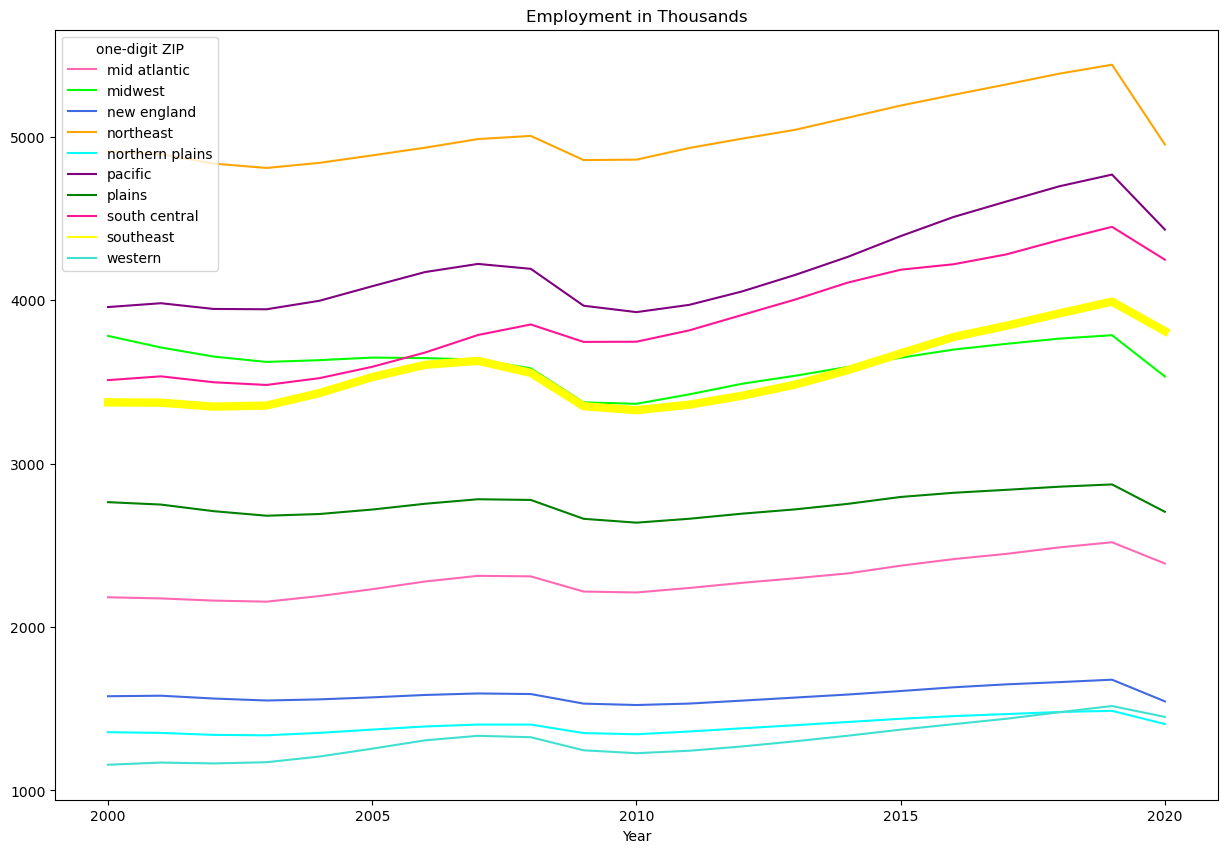

In [150]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands',color=colors).lines[employment_percent_pivot_table.columns.get_loc('southeast')].set_linewidth(6)

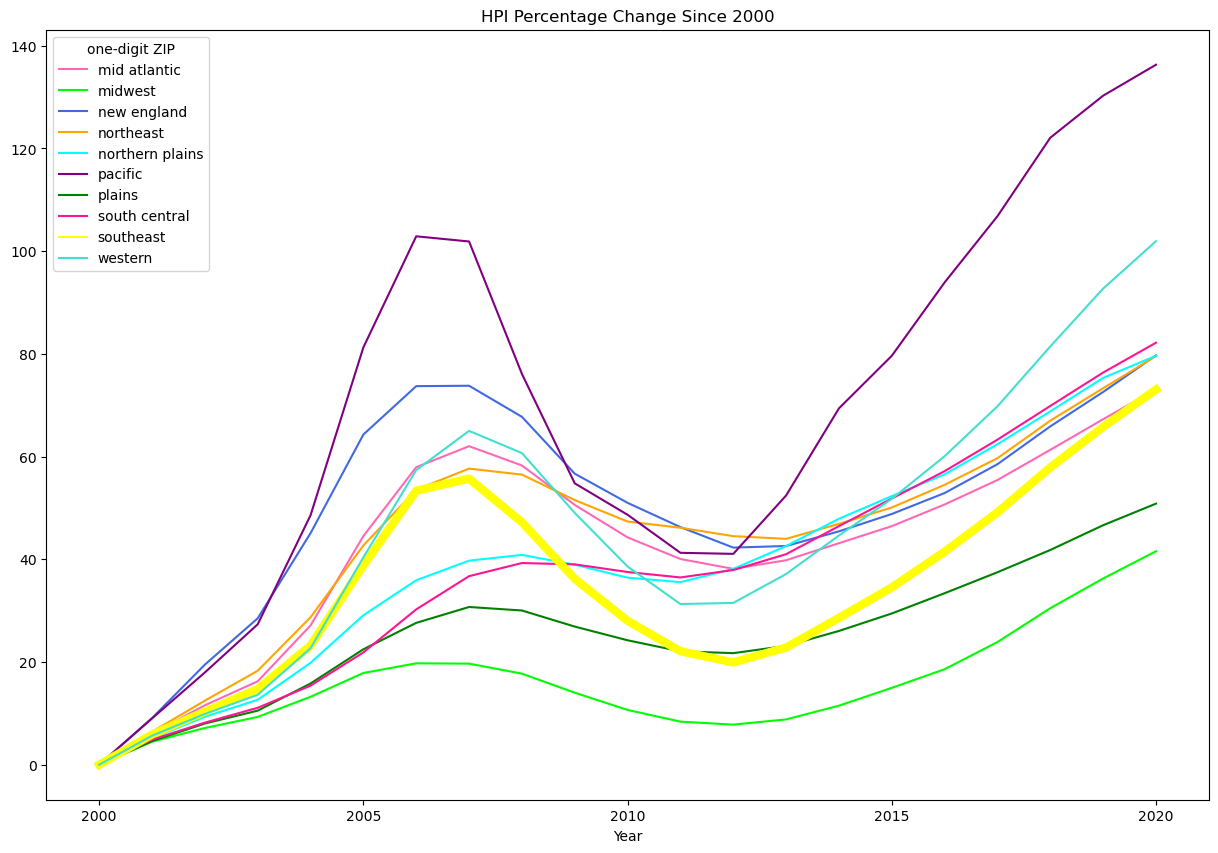

In [151]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000',color=colors).lines[HPI_Percent_change_since_2000_pivot_table.columns.get_loc('southeast')].set_linewidth(6)

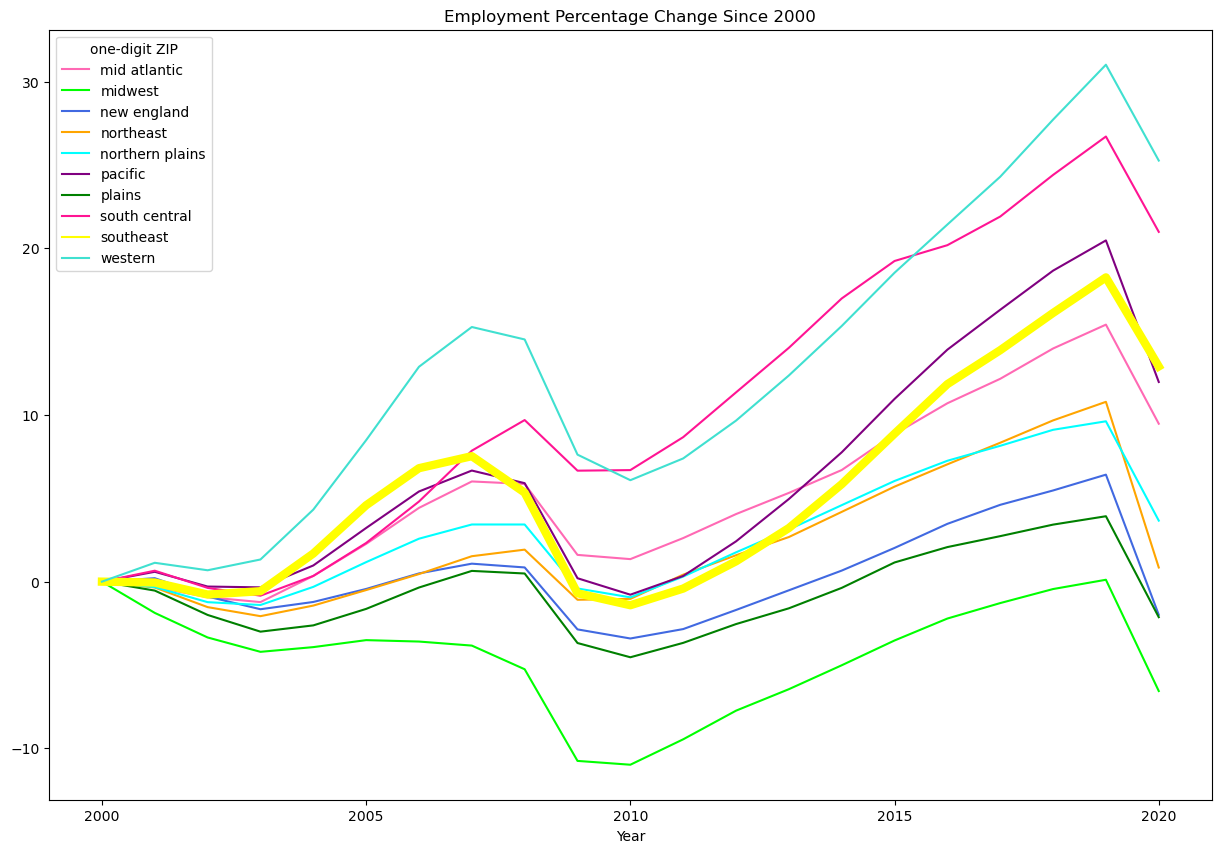

In [152]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000',color=colors).lines[Employment_Percent_change_since_2000_pivot_table.columns.get_loc('southeast')].set_linewidth(6)

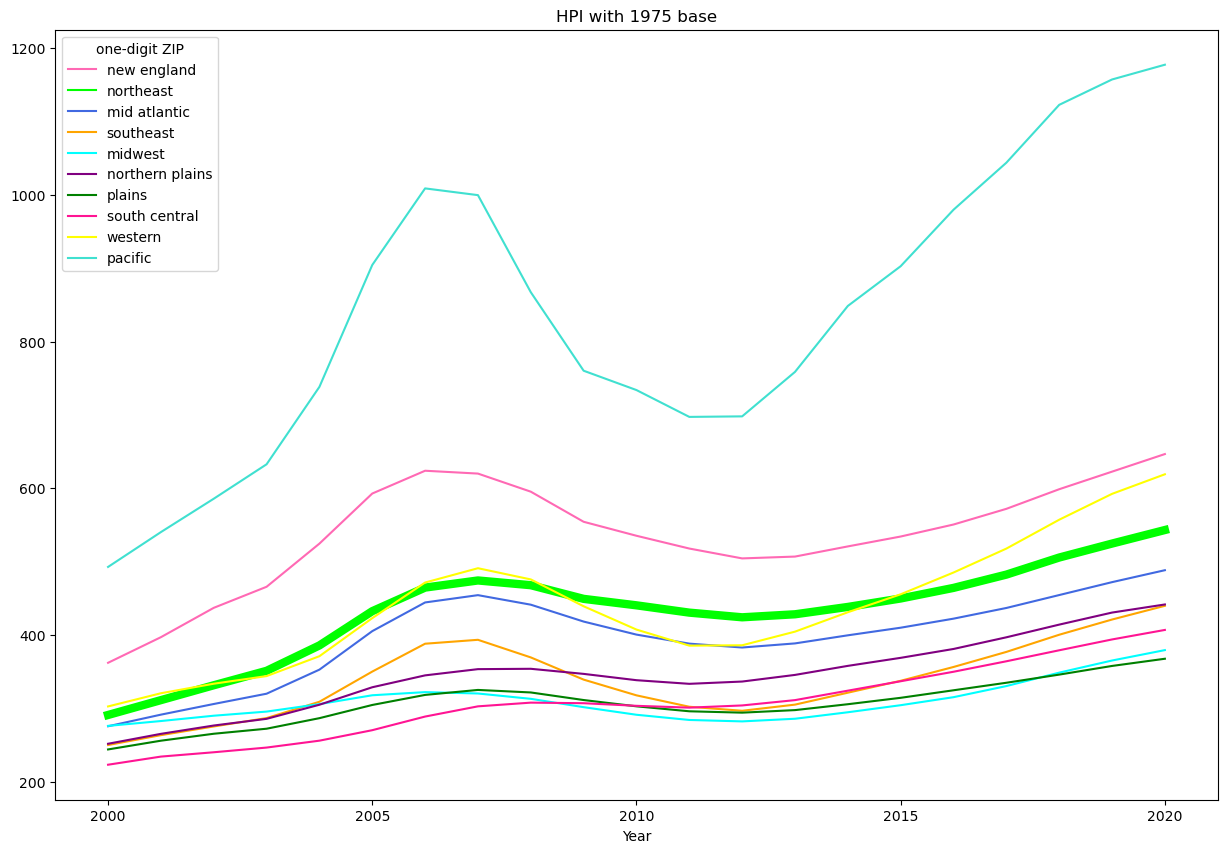

In [153]:
hpi_1975_base_pivot.plot(kind='line', figsize=(15, 10), xticks=[2000, 2005, 2010, 2015, 2020], title='HPI with 1975 base',color=colors).lines[hpi_1975_base_pivot.columns.get_loc('northeast')].set_linewidth(6)

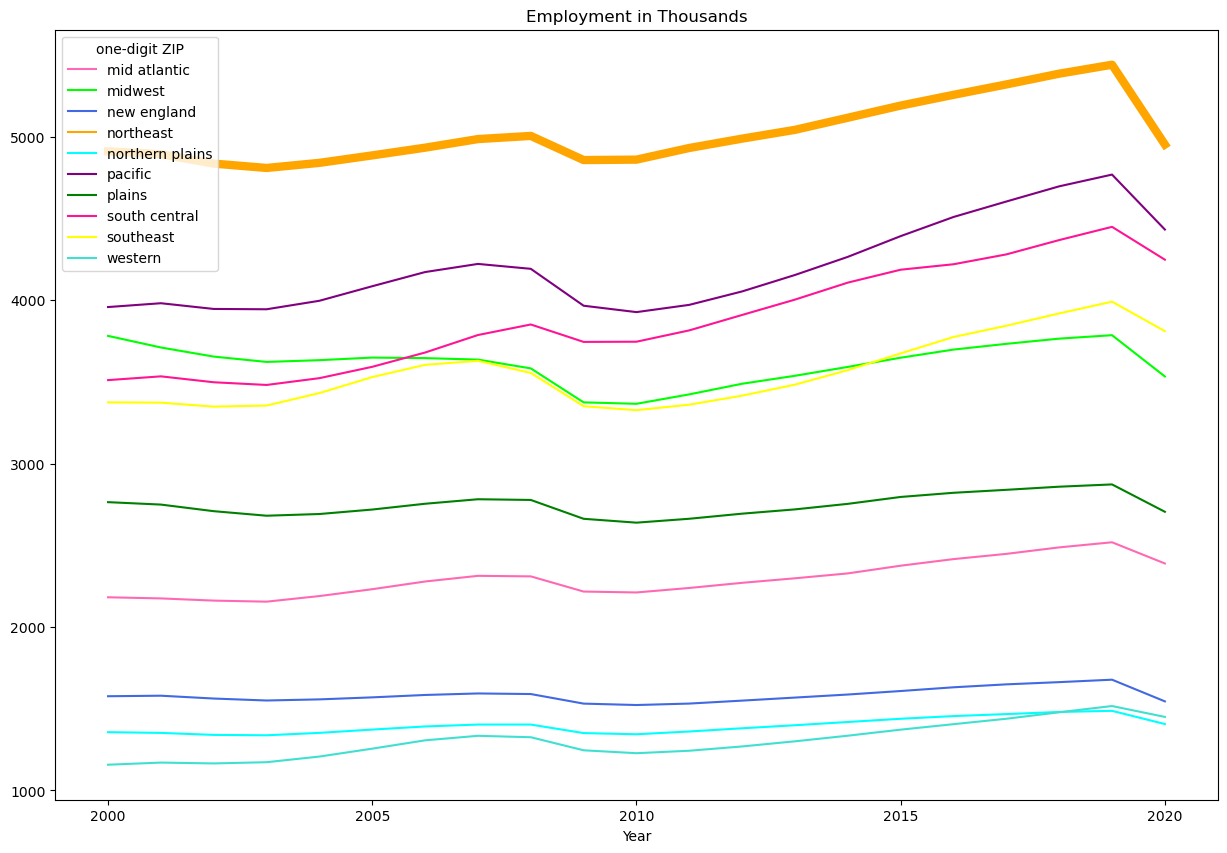

In [154]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands',color=colors).lines[employment_percent_pivot_table.columns.get_loc('northeast')].set_linewidth(6)

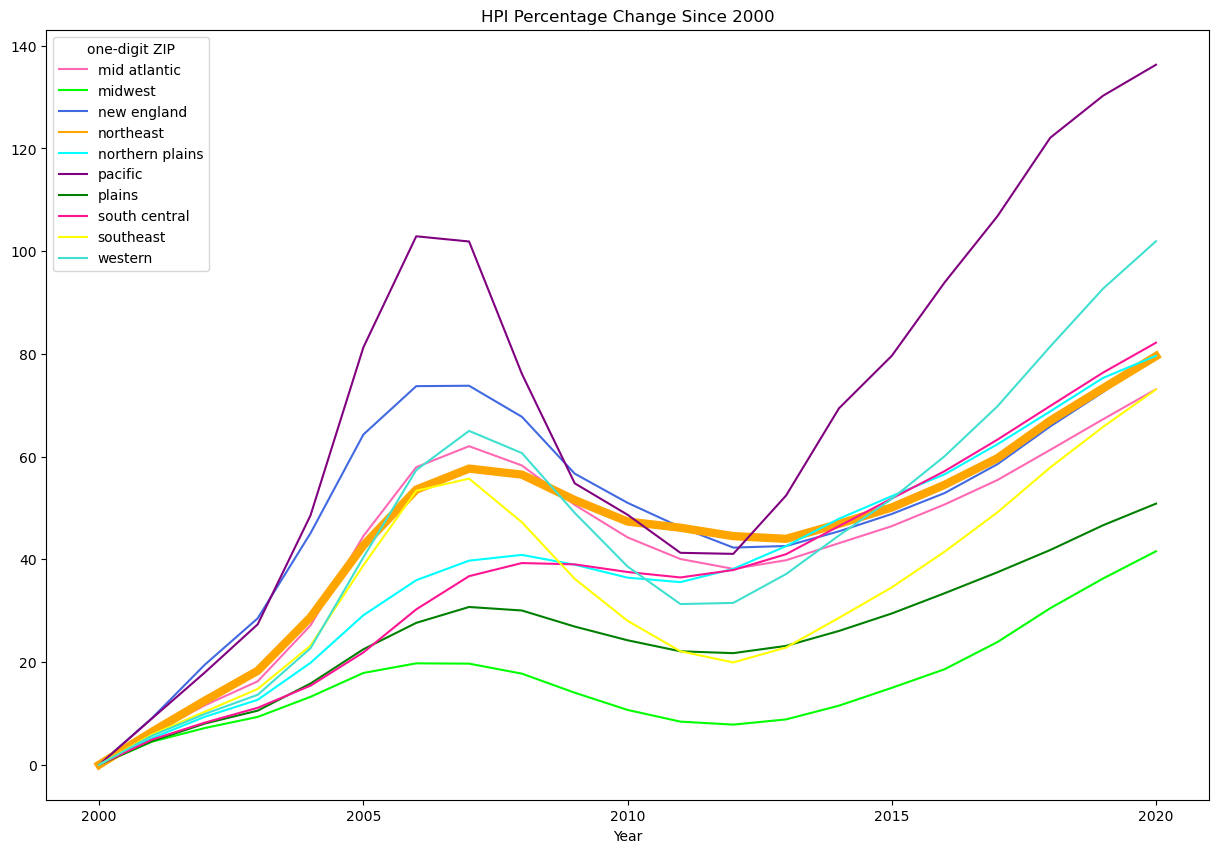

In [155]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000',color=colors).lines[HPI_Percent_change_since_2000_pivot_table.columns.get_loc('northeast')].set_linewidth(6)

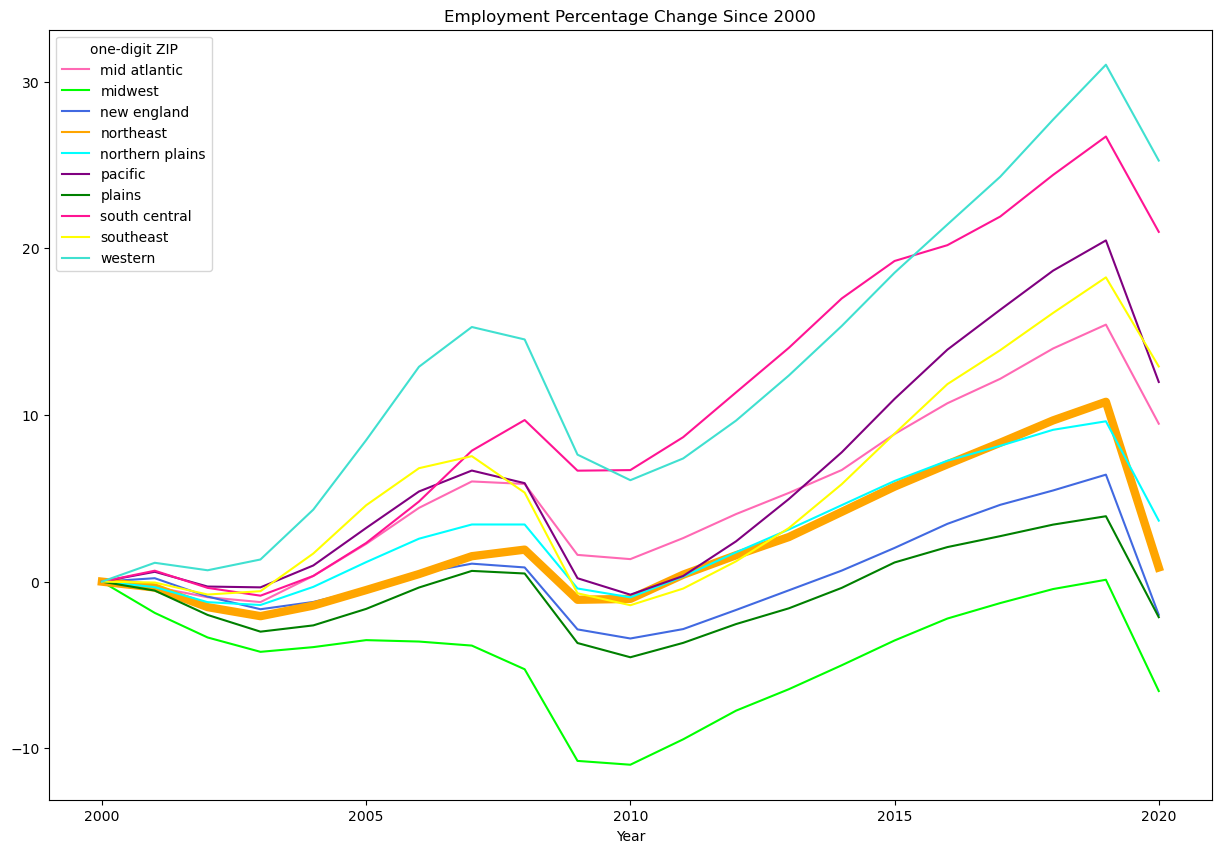

In [156]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000',color=colors).lines[Employment_Percent_change_since_2000_pivot_table.columns.get_loc('northeast')].set_linewidth(6)

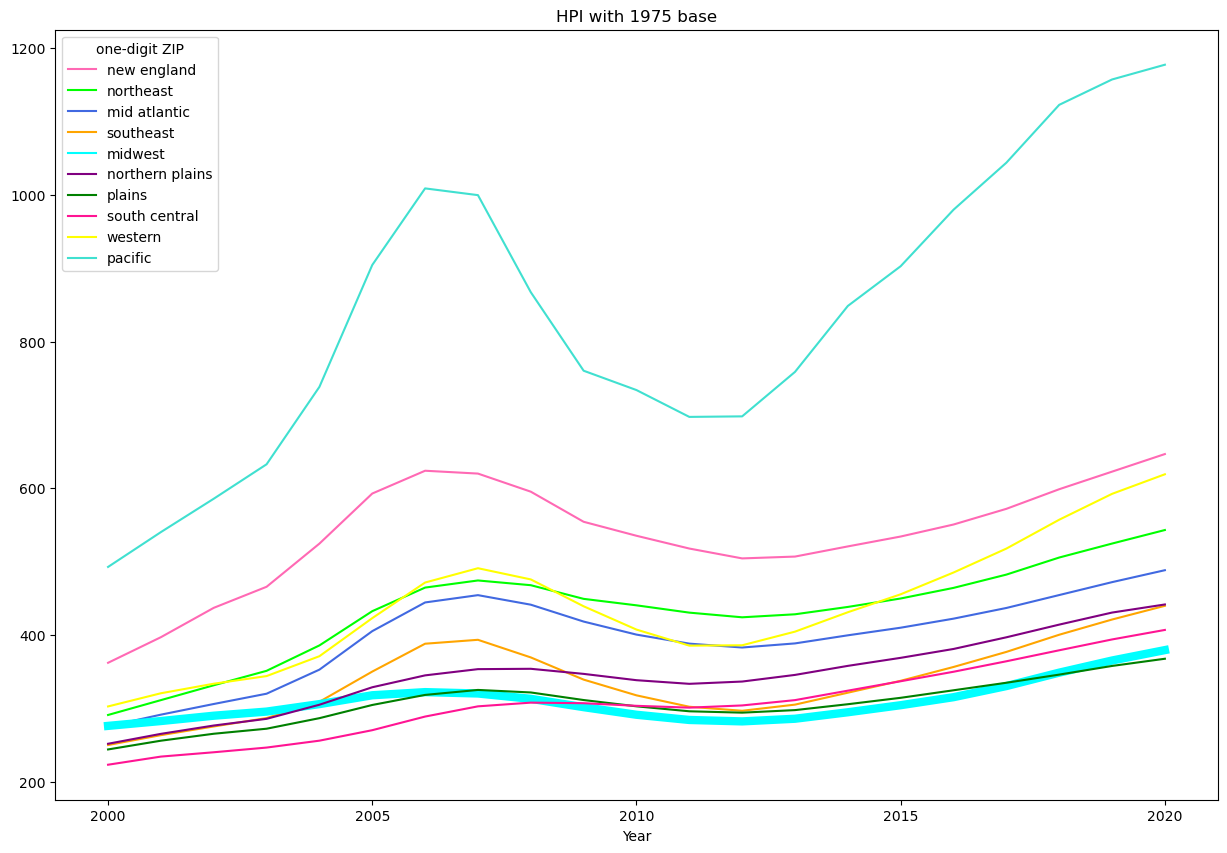

In [157]:
hpi_1975_base_pivot.plot(kind='line', figsize=(15, 10), xticks=[2000, 2005, 2010, 2015, 2020], title='HPI with 1975 base',color=colors).lines[hpi_1975_base_pivot.columns.get_loc('midwest')].set_linewidth(6)

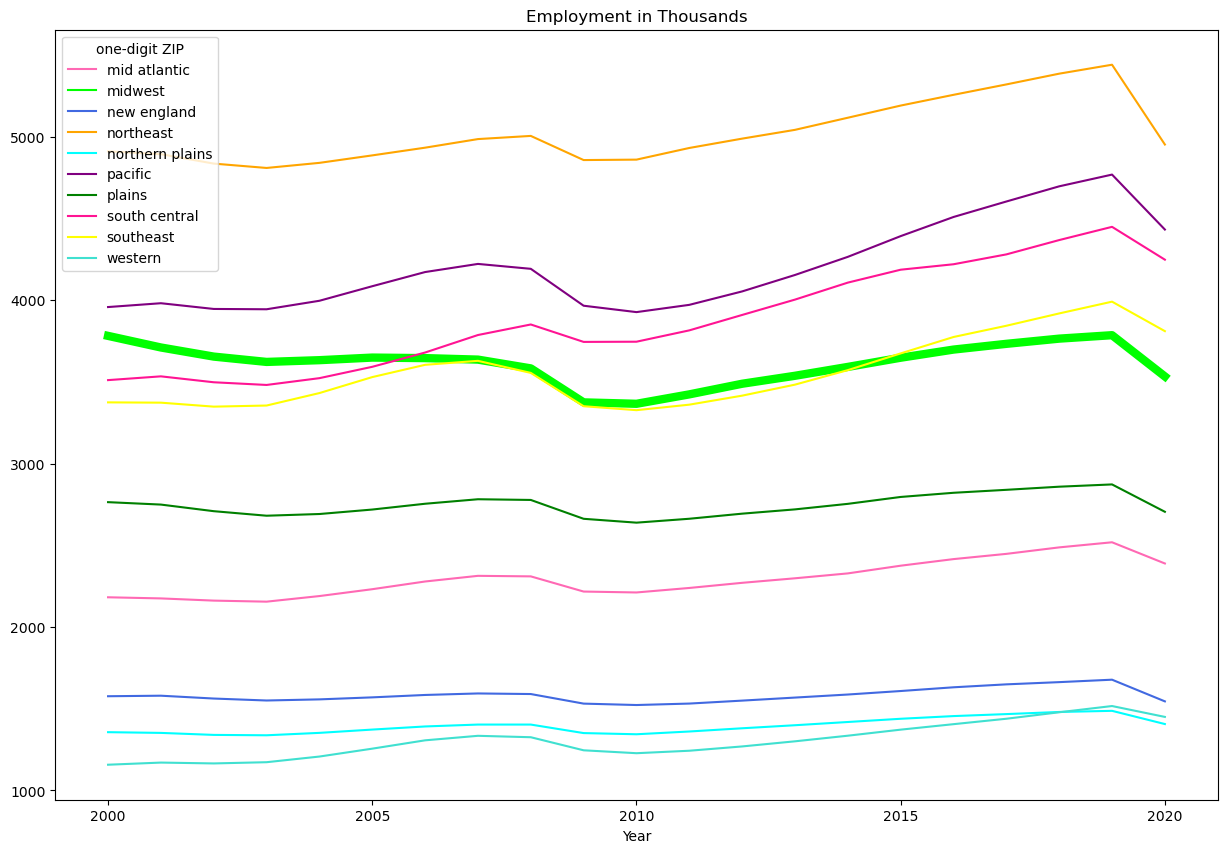

In [158]:
employment_percent_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment in Thousands',color=colors).lines[employment_percent_pivot_table.columns.get_loc('midwest')].set_linewidth(6)

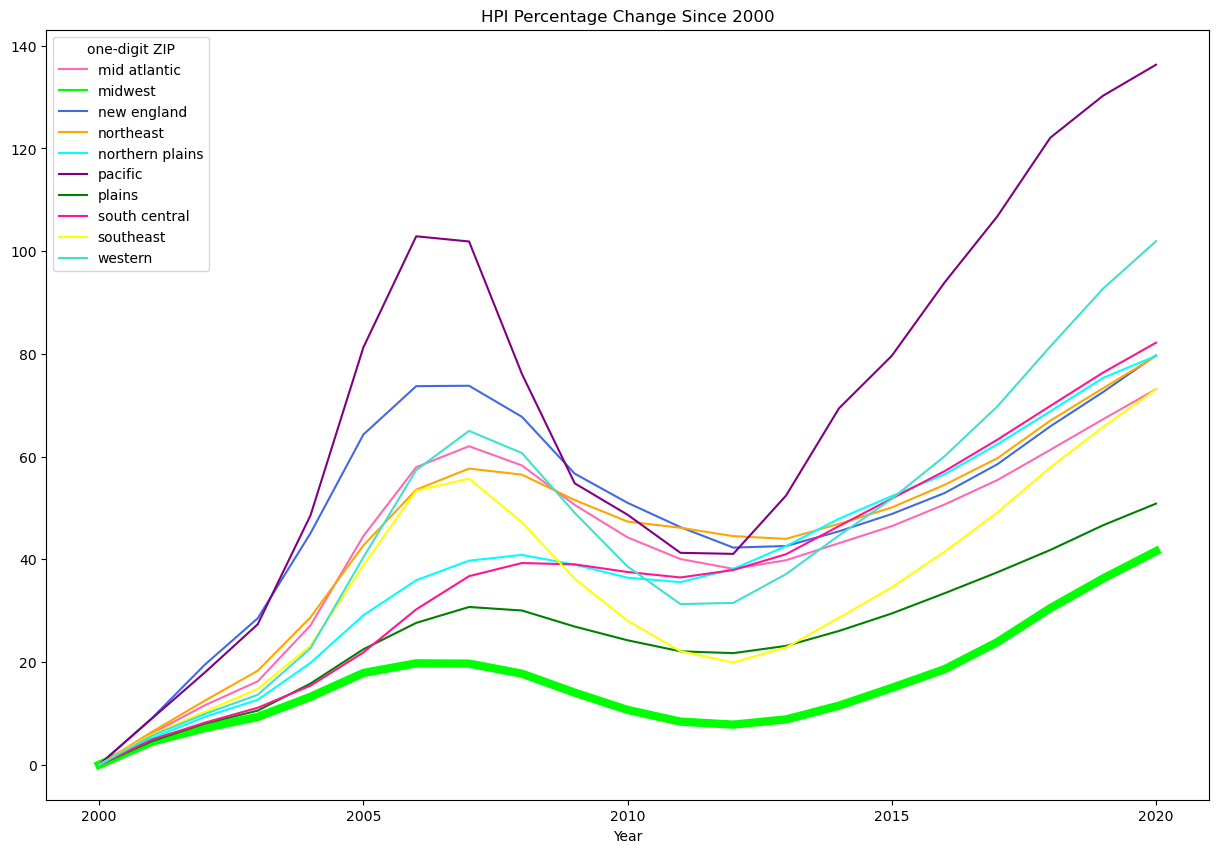

In [159]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='HPI Percentage Change Since 2000',color=colors).lines[HPI_Percent_change_since_2000_pivot_table.columns.get_loc('midwest')].set_linewidth(6)

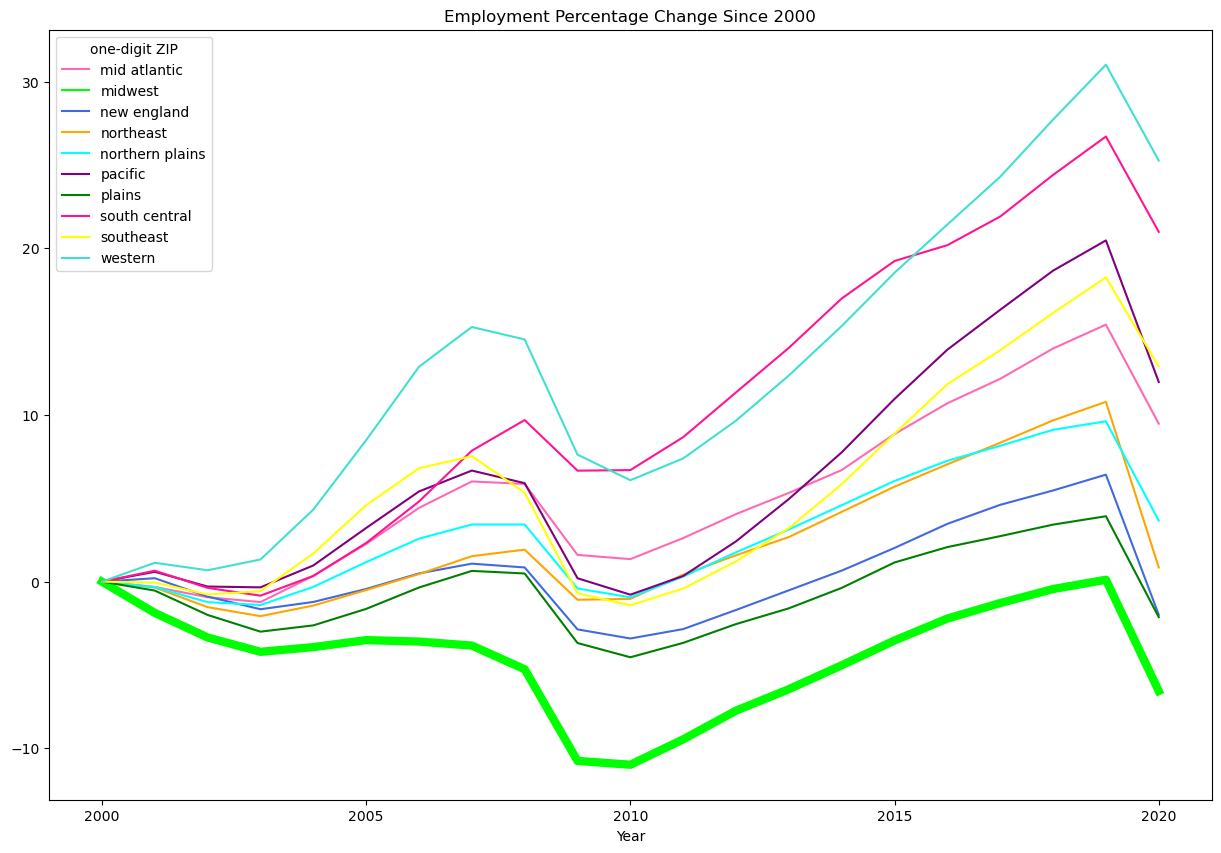

In [160]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line',figsize=(15,10),xticks=[2000,2005,2010,2015,2020],title='Employment Percentage Change Since 2000',color=colors).lines[Employment_Percent_change_since_2000_pivot_table.columns.get_loc('midwest')].set_linewidth(6)

In [161]:
ZIP_VS_HPI.groupby('one-digit ZIP')[['Percent change since 2000','employment percent change since 2000']].corr()

Percent change since 2000  \
one-digit ZIP                                                                     
mid atlantic    Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.762197   
midwest         Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.220923   
new england     Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.283330   
northeast       Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.589409   
northern plains Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.826440   
pacific         Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.844023   
plains          Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.463294   
south central   Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.949238   
southeast       Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.824086   
western         Percent change since 2000                              1.000000   
                employment percent change since 2000                   0.934235   

                                                      employment percent change since 2000  
one-digit ZIP                                                                               
mid atlantic    Percent change since 2000                                         0.762197  
                employment percent change since 2000                              1.000000  
midwest         Percent change since 2000                                         0.220923  
                employment percent change since 2000                              1.000000  
new england     Percent change since 2000                                         0.283330  
                employment percent change since 2000                              1.000000  
northeast       Percent change since 2000                                         0.589409  
                employment percent change since 2000                              1.000000  
northern plains Percent change since 2000                                         0.826440  
                employment percent change since 2000                              1.000000  
pacific         Percent change since 2000                                         0.844023  
                employment percent change since 2000                              1.000000  
plains          Percent change since 2000                                         0.463294  
                employment percent change since 2000                              1.000000  
south central   Percent change since 2000                                         0.949238  
                employment percent change since 2000                              1.000000  
southeast       Percent change since 2000                                         0.824086  
                employment percent change since 2000                              1.000000  
western         Percent change since 2000                                         0.934235  
                employment percent change since 2000                              1.000000

In [162]:
ZIP_VS_HPI

one-digit ZIP  Year  HPI with 2000 base  1975 HPI base  \
0    new england  2000          100.000000     362.011688   
1    new england  2001          109.081169     396.925455   
2    new england  2002          119.488961     436.928961   
3    new england  2003          128.511558     465.643462   
4    new england  2004          145.091299     524.491154   
..           ...   ...                 ...            ...   
16       pacific  2016          193.916591     979.643977   
17       pacific  2017          206.816705    1043.760909   
18       pacific  2018          222.095568    1122.624886   
19       pacific  2019          230.280000    1157.207045   
20       pacific  2020          236.302386    1177.330341   

    Percent change since 2000  HPI year by year percent change since 2000  \
0                    0.000000                                    0.000000   
1                    9.081169                                    9.081169   
2                   19.488961                                    9.541328   
3                   28.511558                                    7.550988   
4                   45.091299                                   12.901361   
..                        ...                                         ...   
16                  93.916591                                    7.955119   
17                 106.816705                                    6.652403   
18                 122.095568                                    7.387635   
19                 130.280000                                    3.685095   
20                 136.302386                                    2.615245   

    Percent change since 2010  zip  employment_by_thosands  \
0                  -33.770619    0             1576.701190   
1                  -27.756217    0             1579.947619   
2                  -20.863201    0             1562.577381   
3                  -14.887591    0             1550.591667   
4                   -3.906931    0             1557.476190   
..                        ...  ...                     ...   
16                  30.434543    9             4509.011667   
17                  39.111575    9             4603.766667   
18                  49.388631    9             4696.645000   
19                  54.893743    9             4768.461667   
20                  58.944594    9             4432.243333   

    employment year by year percent change  \
0                                 0.000000   
1                                 0.205900   
2                                -1.099419   
3                                -0.767048   
4                                 0.443993   
..                                     ...   
16                                2.664083   
17                                2.101458   
18                                2.017442   
19                                1.529106   
20                               -7.050876   

    employment percent change since 2000  employment percent change since 2010  
0                               0.000000                              3.531679  
1                               0.205900                              3.744850  
2                              -0.895782                              2.604260  
3                              -1.655959                              1.817237  
4                              -1.219318                              2.269298  
..                                   ...                                   ...  
16                             13.921947                             14.820819  
17                             16.315969                             17.233731  
18                             18.662576                             19.598854  
19                             20.477053                             21.427647  
20                             11.982365                             12.865934  

[210 rows x 12 columns]